In [1]:
import numpy as np
import pandas as pd
pd.options.display.float_format = '{:,}'.format
from pandas.plotting import autocorrelation_plot
from math import sqrt
import researchpy as rp
import scipy as sp
from scipy import stats
import scipy.signal
from scipy.signal import fftconvolve, convolve
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact
import random as ran
from pprint import pprint

from datetime import datetime
from datetime import timedelta
from dateutil.relativedelta import *

from imblearn.over_sampling import SMOTE, SMOTENC
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.calibration import CalibratedClassifierCV
from sklearn.dummy import DummyClassifier, DummyRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, RidgeCV, LassoCV, ElasticNetCV, LogisticRegression
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, cross_validate, KFold, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, MinMaxScaler, RobustScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer, ENGLISH_STOP_WORDS
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz, plot_tree
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.svm import SVC, SVR, LinearSVC, LinearSVR
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn import metrics
from sklearn import datasets
from sklearn import set_config
set_config(display='diagram')
from xgboost import XGBClassifier, XGBRegressor
from textblob import TextBlob, Word
from nltk.stem.snowball import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
#from textacy.preprocess import preprocess_text

# from gensim import corpora, models, matutils
from collections import defaultdict, Counter

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tsa.stattools import acf, pacf, adfuller
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX

import tensorflow as tf

import patsy
from itertools import combinations

import graphviz #conda install graphviz
import json
import requests
import urllib
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import time
from time import sleep
import re
import twitter

2024-06-07 22:47:16.891820: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
%matplotlib inline
#plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

In [3]:
from platform import python_version
print(python_version())

3.12.3


## Build and document a working model, prototype, recommendation, or solution

The [Chicago Crime Data](https://console.cloud.google.com/marketplace/details/city-of-chicago-public-data/chicago-crime?filter=solution-type:dataset&id=a985ccaf-0a3a-4eb9-a2de-c4fd07de08f0)set is hosted in Google BigQuery. I retrieved this BigQuery data as a Pandas DataFrame and then exported the DataFrame as a CSV file which will be used in the data modeling.

### Chicago Crime Data
![ChicagoSeal](Images/ChicagoSeal.png)
City of Chicago <br>
Chicago Police Department crime data from 2001 to present

#### Overview

This dataset reflects reported incidents of crime (with the exception of murders where data exists for each victim) that occurred in the City of Chicago from 2001 to present, minus the most recent seven days. Data is extracted from the Chicago Police Department's CLEAR (Citizen Law Enforcement Analysis and Reporting) system. In order to protect the privacy of crime victims, addresses are shown at the block level only and specific locations are not identified.

This data includes unverified reports supplied to the Police Department. The preliminary crime classifications may be changed at a later date based upon additional investigation and there is always the possibility of mechanical or human error. Therefore, the Chicago Police Department does not guarantee (either expressed or implied) the accuracy, completeness, timeliness, or correct sequencing of the information. The information should not be used for comparison purposes over time.

<table style="width:100%;">
<colgroup>
<col width="15%" />
<col width="10%" />
<col width="10%" />
<col width="65%" />
</colgroup>
<thead>
<tr class="header">
<th align="left">Field name</th>
<th align="left">Type</th>
<th align="left">Mode</th>
<th align="left">Description</th>
</tr>
</thead>
<tbody>
<tr class="odd">
<td align="left">unique_key</td>
<td align="right">INTEGER</td>
<td align="left">REQUIRED</td>
<td align="left">Unique identifier for the record.</td>
</tr>
<tr class="even">
<td align="left">case_number</td>
<td align="left">STRING</td>
<td align="left">NULLABLE</td>
<td align="left">The Chicago Police Department RD Number (Records Division Number), which is unique to the incident.</td>
</tr>
<tr class="odd">
<td align="left">date</td>
<td align="left">TIMESTAMP</td>
<td align="left">NULLABLE</td>
<td align="left">Date when the incident occurred. this is sometimes a best estimate.</td>
</tr> 
<tr class="even">
<td align="left">block</td>
<td align="left">STRING</td>
<td align="left">NULLABLE</td>
<td align="left">The partially redacted address where the incident occurred, placing it on the same block as the actual address.</td>
</tr> 
<tr class="odd">
<td align="left">iucr</td>
<td align="left">STRING</td>
<td align="left">NULLABLE</td>
<td align="left">The Illinois Unifrom Crime Reporting code. This is directly linked to the Primary Type and Description. See the list of IUCR codes at https://data.cityofchicago.org/d/c7ck-438e.</td>
</tr> 
<tr class="even">
<td align="left">primary_type</td>
<td align="left">STRING</td>
<td align="left">NULLABLE</td>
<td align="left">The primary description of the IUCR code.</td>
</tr>
<tr class="odd">
<td align="left">description</td>
<td align="left">STRING</td>
<td align="left">NULLABLE</td>
<td align="left">The secondary description of the IUCR code, a subcategory of the primary description.</td>
</tr> 
<tr class="even">
<td align="left">location_description</td>
<td align="left">STRING</td>
<td align="left">NULLABLE</td>
<td align="left">Description of the location where the incident occurred.</td>
</tr>
<tr class="odd">
<td align="left">arrest</td>
<td align="left">BOOLEAN</td>
<td align="left">NULLABLE</td>
<td align="left">Indicates whether an arrest was made.</td>
</tr> 
<tr class="even">
<td align="left">domestic</td>
<td align="left">BOOLEAN</td>
<td align="left">NULLABLE</td>
<td align="left">Indicates whether the incident was domestic-related as defined by the Illinois Domestic Violence Act.</td>
</tr>
<tr class="odd">
<td align="left">beat</td>
<td align="left">INTEGER</td>
<td align="left">NULLABLE</td>
<td align="left">Indicates the beat where the incident occurred. A beat is the smallest police geographic area – each beat has a dedicated police beat car. Three to five beats make up a police sector, and three sectors make up a police district. The Chicago Police Department has 22 police districts. See the beats at https://data.cityofchicago.org/d/aerh-rz74.</td>
</tr> 
<tr class="even">
<td align="left">district</td>
<td align="left">INTEGER</td>
<td align="left">NULLABLE</td>
<td align="left">Indicates the police district where the incident occurred. See the districts at https://data.cityofchicago.org/d/fthy-xz3r.</td>
</tr>
<tr class="odd">
<td align="left">ward</td>
<td align="left">INTEGER</td>
<td align="left">NULLABLE</td>
<td align="left">The ward (City Council district) where the incident occurred. See the wards at https://data.cityofchicago.org/d/sp34-6z76.</td>
</tr> 
<tr class="even">
<td align="left">community_area</td>
<td align="left">INTEGER</td>
<td align="left">NULLABLE</td>
<td align="left">Indicates the community area where the incident occurred. Chicago has 77 community areas. See the community areas at https://data.cityofchicago.org/d/cauq-8yn6.</td>
</tr>
<tr class="odd">
<td align="left">fbi_code</td>
<td align="left">STRING</td>
<td align="left">NULLABLE</td>
<td align="left">Indicates the crime classification as outlined in the FBI's National Incident-Based Reporting System (NIBRS). See the Chicago Police Department listing of these classifications at http://gis.chicagopolice.org/clearmap_crime_sums/crime_types.html.</td>
</tr> 
<tr class="even">
<td align="left">x_coordinate</td>
<td align="left">FLOAT</td>
<td align="left">NULLABLE</td>
<td align="left">The x coordinate of the location where the incident occurred in State Plane Illinois East NAD 1983 projection. This location is shifted from the actual location for partial redaction but falls on the same block.</td>
</tr>
<tr class="odd">
<td align="left">y_coordinate</td>
<td align="left">STRING</td>
<td align="left">NULLABLE</td>
<td align="left">The y coordinate of the location where the incident occurred in State Plane Illinois East NAD 1983 projection. This location is shifted from the actual location for partial redaction but falls on the same block.</td>
</tr> 
<tr class="even">
<td align="left">year</td>
<td align="left">INTEGER</td>
<td align="left">NULLABLE</td>
<td align="left">Year the incident occurred.</td>
</tr>
<tr class="odd">
<td align="left">updated_on</td>
<td align="left">TIMESTAMP</td>
<td align="left">NULLABLE</td>
<td align="left">Date and time the record was last updated.</td>
</tr> 
<tr class="even">
<td align="left">latitude</td>
<td align="left">FLOAT</td>
<td align="left">NULLABLE</td>
<td align="left">The latitude of the location where the incident occurred. This location is shifted from the actual location for partial redaction but falls on the same block.</td>
</tr>
<tr class="odd">
<td align="left">longitude</td>
<td align="left">FLOAT</td>
<td align="left">NULLABLE</td>
<td align="left">The longitude of the location where the incident occurred. This location is shifted from the actual location for partial redaction but falls on the same block.</td>
</tr>
<tr class="even">
<td align="left">location</td>
<td align="left">STRING</td>
<td align="left">NULLABLE</td>
<td align="left">The location where the incident occurred in a format that allows for creation of maps and other geographic operations on this data portal. This location is shifted from the actual location for partial redaction but falls on the same block.</td>
</tr>
</tbody>
</table>

### Reading a File

In [4]:
# Create data path variable for loading data
data_path = '/Users/yangweichle/Documents/Employment/TRAINING/DATA SCIENCE/PROJECTS/ClassifyingCriminalOffenses/GCP BigQuery API_Python/Datasets/'

In [5]:
# Read file into DataFrame
# Note: header=0 disables the header from the file
#       dtype: type name or dict of column -> type, default None; data type for data or columns;
#              e.g. {'a': np.float64, 'b': np.int32}; use 'str' or 'object' together with suitable 'na_values' settings
#              to preserve and not interpret dtype
chicago_crime = pd.read_csv(data_path + 'chicago_crime.csv', header=0, 
                            dtype={'iucr': 'object', 'fbi_code': 'object'}) # Comma-separated values file

### Examine the DataFrame

In [6]:
# Return the number of rows and columns (dimensionality) of the DataFrame
print('Rows: {}, Cols: {}'.format(chicago_crime.shape[0], chicago_crime.shape[1]))

Rows: 6876354, Cols: 22


In [7]:
# Print a concise summary of a DataFrame including the index dtype and column dtypes, non-null values, and memory usage
# Note: Useful to quickly see if null values exist
#       show_counts: whether to show the non-null counts
chicago_crime.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6876354 entries, 0 to 6876353
Data columns (total 22 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   unique_key            6876354 non-null  int64  
 1   case_number           6876350 non-null  object 
 2   date                  6876354 non-null  object 
 3   block                 6876354 non-null  object 
 4   iucr                  6876354 non-null  object 
 5   primary_type          6876354 non-null  object 
 6   description           6876354 non-null  object 
 7   location_description  6871341 non-null  object 
 8   arrest                6876354 non-null  bool   
 9   domestic              6876354 non-null  bool   
 10  beat                  6876354 non-null  int64  
 11  district              6876307 non-null  float64
 12  ward                  6261530 non-null  float64
 13  community_area        6262858 non-null  float64
 14  fbi_code              6876354 non-

In [8]:
# Column names (which is "an index")
chicago_crime.columns

Index(['unique_key', 'case_number', 'date', 'block', 'iucr', 'primary_type',
       'description', 'location_description', 'arrest', 'domestic', 'beat',
       'district', 'ward', 'community_area', 'fbi_code', 'x_coordinate',
       'y_coordinate', 'year', 'updated_on', 'latitude', 'longitude',
       'location'],
      dtype='object')

In [9]:
# Sort a DataFrame by multiple columns
# Note: ascending: sort ascending vs. descending; ascending=True is default
#       inplace=True changes the original DataFrame
#chicago_crime.sort_values(by=['X', 'Y'], ascending=True, inplace=True)

In [10]:
# Print the first 5 rows and the last 5 rows of the DataFrame
pd.concat([chicago_crime.head(), chicago_crime.tail()], ignore_index=True)

,unique_key,case_number,date,block,iucr,primary_type,description,location_description,arrest,domestic,...,ward,community_area,fbi_code,x_coordinate,y_coordinate,year,updated_on,latitude,longitude,location
0,11691617,JC264900,2019-05-15 19:00:00+00:00,095XX S AVALON AVE,1750,OFFENSE INVOLVING CHILDREN,CHILD ABUSE,RESIDENCE,False,True,...,8.0,50.0,08B,"1,186,206.0","1,841,979.0",2019,2019-05-22 16:12:53+00:00,41.721514573,-87.593555694,"(41.721514573, -87.593555694)"
1,11679177,JC252697,2019-05-06 20:09:00+00:00,052XX S WELLS ST,4651,OTHER OFFENSE,SEX OFFENDER: FAIL REG NEW ADD,RESIDENCE,False,False,...,3.0,37.0,26,"1,175,491.0","1,870,242.0",2019,2019-05-13 16:13:25+00:00,41.79931753,-87.631958462,"(41.79931753, -87.631958462)"
2,11673919,JC246944,2019-05-02 15:22:00+00:00,033XX W FOSTER AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,SIDEWALK,True,False,...,39.0,13.0,24,"1,152,975.0","1,934,347.0",2019,2019-05-09 16:13:26+00:00,41.975702619,-87.71283079,"(41.975702619, -87.71283079)"
3,11638281,JC203800,2019-03-29 08:45:00+00:00,087XX S STONY ISLAND AVE,0497,BATTERY,AGGRAVATED DOMESTIC BATTERY: OTHER DANG WEAPON,PARKING LOT/GARAGE(NON.RESID.),False,True,...,8.0,48.0,04B,"1,188,323.0","1,847,328.0",2019,2019-04-05 16:07:16+00:00,41.736142605,-87.585631434,"(41.736142605, -87.585631434)"
4,24442,JC195241,2019-03-22 11:55:00+00:00,101XX S AVENUE L,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,False,False,...,10.0,52.0,01A,"1,201,819.0","1,838,463.0",2019,2019-03-29 16:12:07+00:00,41.711483998,-87.536488614,"(41.711483998, -87.536488614)"
5,9166040,HW310535,2013-06-06 15:00:00+00:00,060XX N SHERIDAN RD,5002,OTHER OFFENSE,OTHER VEHICLE OFFENSE,STREET,False,False,...,48.0,77.0,26,"1,168,537.0","1,940,249.0",2013,2018-02-10 15:50:01+00:00,41.99157427,-87.655431953,"(41.99157427, -87.655431953)"
6,3206367,HK220099,2004-03-02 21:00:00+00:00,010XX W HOLLYWOOD AVE,5002,OTHER OFFENSE,OTHER VEHICLE OFFENSE,STREET,True,False,...,48.0,77.0,26,"1,168,363.0","1,938,040.0",2004,2018-02-28 15:56:25+00:00,41.985516503,-87.65613622,"(41.985516503, -87.65613622)"
7,2731927,HJ366343,2003-05-16 03:30:00+00:00,011XX W ARDMORE AVE,5002,OTHER OFFENSE,OTHER VEHICLE OFFENSE,STREET,False,False,...,48.0,77.0,26,"1,167,665.0","1,938,683.0",2003,2018-02-10 15:50:01+00:00,41.987296026,-87.658684774,"(41.987296026, -87.658684774)"
8,3068260,HJ786844,2003-11-23 21:00:00+00:00,059XX N CLARK ST,5002,OTHER OFFENSE,OTHER VEHICLE OFFENSE,STREET,False,False,...,40.0,77.0,26,"1,164,605.0","1,939,296.0",2003,2018-02-28 15:56:25+00:00,41.989043709,-87.669922058,"(41.989043709, -87.669922058)"
9,3841807,HL214136,2005-03-03 23:40:00+00:00,056XX N RIDGE AVE,5002,OTHER OFFENSE,OTHER VEHICLE OFFENSE,PARKING LOT/GARAGE(NON.RESID.),True,False,...,48.0,77.0,26,"1,167,084.0","1,937,517.0",2005,2018-02-28 15:56:25+00:00,41.984109031,-87.660855375,"(41.984109031, -87.660855375)"


#### Identifying important columns to include in the DataFrame.

In [11]:
# Select multiple columns
include_cols = ['date', 'block', 'iucr', 'primary_type', 'description', 'location_description', 'arrest', 'domestic',
                'beat', 'district', 'ward', 'community_area', 'fbi_code', 'x_coordinate', 'y_coordinate', 'year',
                'updated_on', 'latitude', 'longitude', 'location'] 
chicago_crime = chicago_crime[include_cols]

In [12]:
# Return the number of rows and columns (dimensionality) of the DataFrame
print('Rows: {}, Cols: {}'.format(chicago_crime.shape[0], chicago_crime.shape[1]))

Rows: 6876354, Cols: 20


In [13]:
# Print the first 5 rows of the DataFrame
chicago_crime.head()

,date,block,iucr,primary_type,description,location_description,arrest,domestic,beat,district,ward,community_area,fbi_code,x_coordinate,y_coordinate,year,updated_on,latitude,longitude,location
0,2019-05-15 19:00:00+00:00,095XX S AVALON AVE,1750,OFFENSE INVOLVING CHILDREN,CHILD ABUSE,RESIDENCE,False,True,511,5.0,8.0,50.0,08B,"1,186,206.0","1,841,979.0",2019,2019-05-22 16:12:53+00:00,41.721514573,-87.593555694,"(41.721514573, -87.593555694)"
1,2019-05-06 20:09:00+00:00,052XX S WELLS ST,4651,OTHER OFFENSE,SEX OFFENDER: FAIL REG NEW ADD,RESIDENCE,False,False,935,9.0,3.0,37.0,26,"1,175,491.0","1,870,242.0",2019,2019-05-13 16:13:25+00:00,41.79931753,-87.631958462,"(41.79931753, -87.631958462)"
2,2019-05-02 15:22:00+00:00,033XX W FOSTER AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,SIDEWALK,True,False,1712,17.0,39.0,13.0,24,"1,152,975.0","1,934,347.0",2019,2019-05-09 16:13:26+00:00,41.975702619,-87.71283079,"(41.975702619, -87.71283079)"
3,2019-03-29 08:45:00+00:00,087XX S STONY ISLAND AVE,0497,BATTERY,AGGRAVATED DOMESTIC BATTERY: OTHER DANG WEAPON,PARKING LOT/GARAGE(NON.RESID.),False,True,412,4.0,8.0,48.0,04B,"1,188,323.0","1,847,328.0",2019,2019-04-05 16:07:16+00:00,41.736142605,-87.585631434,"(41.736142605, -87.585631434)"
4,2019-03-22 11:55:00+00:00,101XX S AVENUE L,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,False,False,432,4.0,10.0,52.0,01A,"1,201,819.0","1,838,463.0",2019,2019-03-29 16:12:07+00:00,41.711483998,-87.536488614,"(41.711483998, -87.536488614)"


In [14]:
# Convert a string to the datetime format
# Note: This is often slow -- consider doing it in the read_csv() method
chicago_crime['date'] = pd.to_datetime(chicago_crime['date']).dt.date
chicago_crime['date'] = pd.to_datetime(chicago_crime['date'])
type(chicago_crime.date[0])

pandas._libs.tslibs.timestamps.Timestamp

In [15]:
# Rename one or more columns in the original DataFrame rather than returning a new view
chicago_crime = chicago_crime.rename(columns={'location': 'lat_long'})

In [16]:
# Print a concise summary of a DataFrame including the index dtype and column dtypes, non-null values, and memory usage
# Note: Useful to quickly see if null values exist
#       show_counts: whether to show the non-null counts
chicago_crime.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6876354 entries, 0 to 6876353
Data columns (total 20 columns):
 #   Column                Non-Null Count    Dtype         
---  ------                --------------    -----         
 0   date                  6876354 non-null  datetime64[ns]
 1   block                 6876354 non-null  object        
 2   iucr                  6876354 non-null  object        
 3   primary_type          6876354 non-null  object        
 4   description           6876354 non-null  object        
 5   location_description  6871341 non-null  object        
 6   arrest                6876354 non-null  bool          
 7   domestic              6876354 non-null  bool          
 8   beat                  6876354 non-null  int64         
 9   district              6876307 non-null  float64       
 10  ward                  6261530 non-null  float64       
 11  community_area        6262858 non-null  float64       
 12  fbi_code              6876354 non-null  ob

### Examine Missing Values

In [17]:
# Count the missing values in each column of a DataFrame - sum() works because True is 1 and False is 0
null_counts = chicago_crime.isnull().sum()
total_counts = chicago_crime.isnull().count()
missing_percentage = round(null_counts/total_counts*100, 2)
missing_df = pd.DataFrame({'null_count': null_counts, 'percentage': missing_percentage})
missing_df[missing_df.null_count > 0]

,null_count,percentage
location_description,5013,0.07
district,47,0.0
ward,614824,8.94
community_area,613496,8.92
x_coordinate,64983,0.95
y_coordinate,64983,0.95
latitude,64983,0.95
longitude,64983,0.95
lat_long,64983,0.95


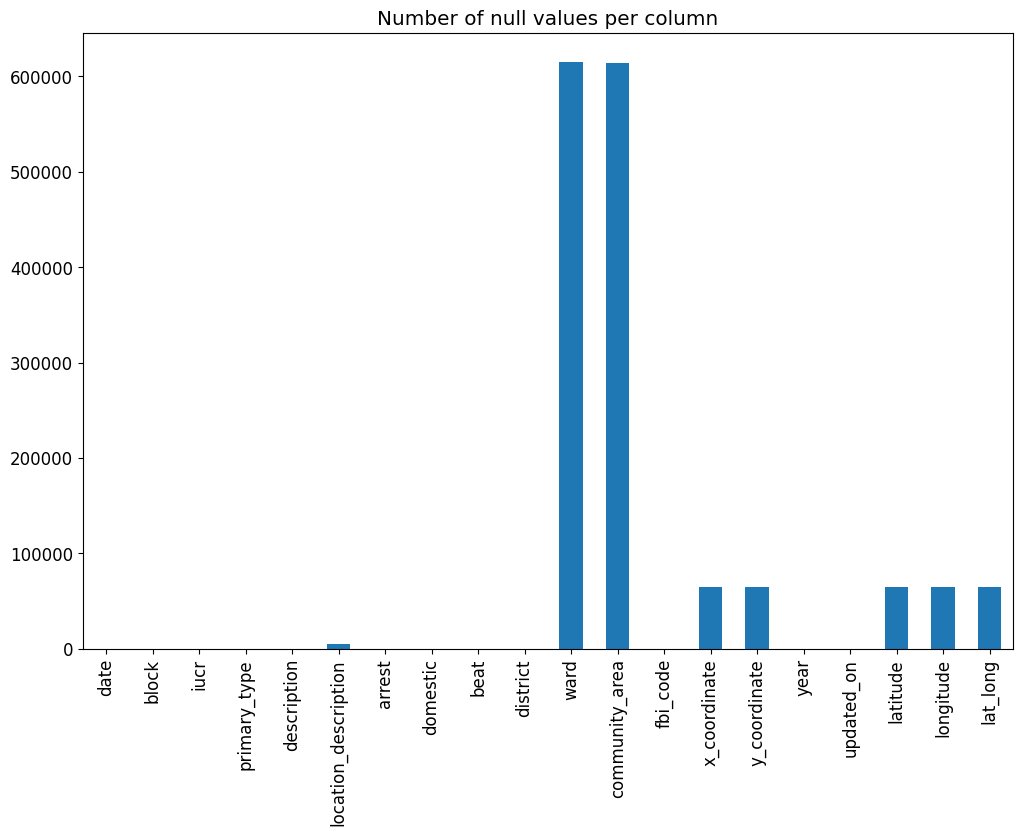

In [18]:
# Create a vertical bar plot by number of missing values per column using matplotlib
# Note: figsize: a tuple (width, height) in inches
chicago_crime.isnull().sum().plot.bar();
plt.title('Number of null values per column');

### Examine the Columns

In [19]:
# Categorical column frequency
# Returns counts of unique values in descending order (first element is the most frequently-occurring element)
# Note: Excludes NA values by default
def value_counts_func(df, var, bar, title=''):
    value_counts = df[var].value_counts(dropna=False)
    value_percents = round(df[var].value_counts(normalize=True, dropna=False)*100, 2)
    df_ = pd.DataFrame({'counts': value_counts, 'percentage': value_percents}).rename_axis(var).reset_index()
    
    if bar:
        # Create a vertical bar plot
        # Note: figsize: a tuple (width, height) in inches
        #       rot: rotation for ticks (xticks for vertical, yticks for horizontal plots)
        percents = df[var].value_counts(normalize=True, dropna=False)*100
        ax = percents.plot(kind='bar', figsize=(10, 6), rot=0);
        ax.set_title(title);
        ax.set_ylabel('Percentage');

    format_dict = {'percentage': '{:.2f}'}
    return df_.style.format(format_dict).hide(axis='index')

In [20]:
# Categorical column frequency
# Returns counts of unique values in descending order (first element is the most frequently-occurring element)
# Note: Excludes NA values by default
value_counts_func(chicago_crime, 'primary_type', bar=False)

primary_type,counts,percentage
THEFT,1448232,21.06
BATTERY,1256079,18.27
CRIMINAL DAMAGE,784264,11.41
NARCOTICS,718354,10.45
ASSAULT,428501,6.23
OTHER OFFENSE,427465,6.22
BURGLARY,392857,5.71
MOTOR VEHICLE THEFT,318907,4.64
DECEPTIVE PRACTICE,272813,3.97
ROBBERY,259579,3.77


#### Drop non-criminal observations

In [21]:
# Return elements, either from `x` or `y`, depending on `condition`
chicago_crime['non_criminal'] = np.where(chicago_crime.primary_type.isin(['NON-CRIMINAL', 'NON - CRIMINAL', 'NON-CRIMINAL (SUBJECT SPECIFIED)']), 1, 0)

In [22]:
# Categorical column frequency
# Returns counts of unique values in descending order (first element is the most frequently-occurring element)
# Note: Excludes NA values by default
value_counts_func(chicago_crime, 'non_criminal', bar=False)

non_criminal,counts,percentage
0,6876137,100.00
1,217,0.00


In [23]:
# Excluding non-criminal values
chicago_crime = chicago_crime[chicago_crime.non_criminal == 0]

# Remove columns by specifying directly column names
# Note: inplace=True changes the original DataFrame
chicago_crime.drop(columns=['non_criminal'], inplace=True)

In [24]:
# Return the number of rows and columns (dimensionality) of the DataFrame
print('Rows: {}, Cols: {}'.format(chicago_crime.shape[0], chicago_crime.shape[1]))

Rows: 6876137, Cols: 20


#### Combining 'OTHER NARCOTIC VIOLATION' with 'NARCOTICS'
#### Combining 'DOMESTIC VIOLENCE' with 'ASSAULT'

In [25]:
# Replace values in a column
# Note: to_replace: how to find the values that will be replaced
#       inplace=True changes the original DataFrame
#chicago_crime.primary_type.replace('OTHER NARCOTIC VIOLATION', 'NARCOTICS', inplace=True)
chicago_crime.replace(to_replace={'primary_type': {'OTHER NARCOTIC VIOLATION': 'NARCOTICS', 
                                                   'DOMESTIC VIOLENCE': 'ASSAULT'}}, inplace=True)

In [26]:
# Categorical column frequency
# Returns counts of unique values in descending order (first element is the most frequently-occurring element)
# Note: Excludes NA values by default
value_counts_func(chicago_crime, 'primary_type', bar=False)

primary_type,counts,percentage
THEFT,1448232,21.06
BATTERY,1256079,18.27
CRIMINAL DAMAGE,784264,11.41
NARCOTICS,718480,10.45
ASSAULT,428502,6.23
OTHER OFFENSE,427465,6.22
BURGLARY,392857,5.71
MOTOR VEHICLE THEFT,318907,4.64
DECEPTIVE PRACTICE,272813,3.97
ROBBERY,259579,3.78


[Chicago Police Department - Illinois Uniform Crime Reporting (IUCR) Codes](https://data.cityofchicago.org/Public-Safety/Chicago-Police-Department-Illinois-Uniform-Crime-R/c7ck-438e)

IUCR codes are four digit codes that law enforcement agencies use to classify criminal incidents when taking individual reports. These codes are also used to aggregate types of cases for statistical purposes. In Illinois, the Illinois State Police establish IUCR codes, but the agencies can add codes to suit their individual needs. The Chicago Police Department currently uses more than 350 IUCR codes to classify criminal offenses, divided into “Index” and “Non-Index” offenses. Index offenses are the offenses that are collected nation-wide by the Federal Bureaus of Investigation’s Uniform Crime Reports program to document crime trends over time (data released semi-annually), and include murder, criminal sexual assault, robbery, aggravated assault & battery, burglary, theft, motor vehicle theft, and arson. Non-index offenses are all other types of criminal incidents, including vandalism, weapons violations, public peace violations, etc.

Note: `iucr` will be used to define an Index/Non-Index offense variable.

In [27]:
# Categorical column frequency
# Returns counts of unique values in descending order (first element is the most frequently-occurring element)
# Note: Excludes NA values by default
value_counts_func(chicago_crime, 'iucr', bar=False)

iucr,counts,percentage
0820,557719,8.11
0486,528876,7.69
0460,510721,7.43
1320,368506,5.36
1310,361146,5.25
0810,355390,5.17
0560,297211,4.32
1811,277353,4.03
0610,265849,3.87
0910,250413,3.64


#### Create indicators for Index/Non-Index offense based on CSV file: [Chicago Police Department - Illinois Uniform Crime Reporting (IUCR) Codes](https://data.cityofchicago.org/Public-Safety/Chicago-Police-Department-Illinois-Uniform-Crime-R/c7ck-438e).

In [28]:
# Return elements, either from `x` or `y`, depending on `condition`
chicago_crime['index_offense'] = np.where(chicago_crime.iucr.isin(['0110', '0130', '0261', '0262', '0263', '0264',
                                                                   '0265', '0266', '0271', '0272', '0273', '0274',
                                                                   '0275', '0281', '0291', '0312', '0313', '031A',
                                                                   '031B', '0320', '0325', '0326', '0330', '0331',
                                                                   '0334', '0337', '033A', '033B', '0340', '041A',
                                                                   '041B', '0420', '0430', '0450', '0451', '0452',
                                                                   '0453', '0461', '0462', '0479', '0480', '0481',
                                                                   '0482', '0483', '0485', '0487', '0488', '0489',
                                                                   '0490', '0491', '0492', '0493', '0495', '0496',
                                                                   '0497', '0498', '0510', '051A', '051B', '0520',
                                                                   '0530', '0550', '0551', '0552', '0553', '0555',
                                                                   '0556', '0557', '0558', '0610', '0620', '0630',
                                                                   '0650', '0810', '0820', '0850', '0860', '0865',
                                                                   '0870', '0880', '0890', '0895', '0910', '0915',
                                                                   '0917', '0918', '0920', '0925', '0927', '0928',
                                                                   '0930', '0935', '0937', '0938', '1010', '1020',
                                                                   '1025', '1090', '1753', '1754']), 1, 0)

index_offense,counts,percentage
0,4177733,60.76
1,2698404,39.24


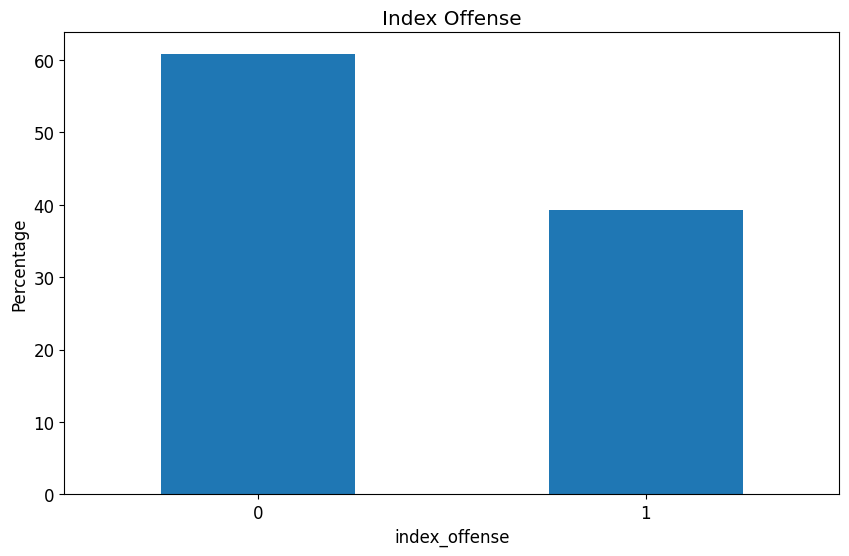

In [29]:
# Categorical column frequency
# Returns counts of unique values in descending order (first element is the most frequently-occurring element)
# Note: Excludes NA values by default
value_counts_func(chicago_crime, 'index_offense', bar=True, title='Index Offense')

In [30]:
# Return elements, either from `x` or `y`, depending on `condition`
chicago_crime['nonindex_offense'] = np.where(chicago_crime.iucr.isin(['0141', '0142', '0440', '0454', '0460', '0470',
                                                                      '0475', '0484', '0486', '0494', '0545', '0554', 
                                                                      '0560', '0580', '0581', '0583', '0584', '1030',
                                                                      '1035', '1050', '1055', '1110', '1120', '1121',
                                                                      '1122', '1130', '1135', '1140', '1150', '1151',
                                                                      '1152', '1153', '1154', '1155', '1156', '1160',
                                                                      '1170', '1185', '1195', '1200', '1205', '1206',
                                                                      '1210', '1220', '1230', '1235', '1240', '1241',
                                                                      '1242', '1245', '1255', '1260', '1624', '1261',
                                                                      '1265', '1305', '1310', '1320', '1330', '1335',
                                                                      '1340', '1345', '1350', '1360', '1365', '1370',
                                                                      '1375', '141A', '141B', '141C', '142A', '142B',
                                                                      '1435', '143A', '143B', '143C', '1440', '1450',
                                                                      '1460', '1475', '1476', '1477', '1478', '1479',
                                                                      '1480', '1481', '1505', '1506', '1507', '1510',
                                                                      '1511', '1512', '1513', '1515', '1520', '1521',
                                                                      '1525', '1526', '1530', '1531', '1535', '1536',
                                                                      '1537', '1540', '1541', '1542', '1544', '1549',
                                                                      '1562', '1563', '1564', '1565', '1566', '1570',
                                                                      '1572', '1574', '1576', '1578', '1580', '1582',
                                                                      '1585', '1590', '1610', '1611', '1620', '1621',
                                                                      '1622', '1623', '1625', '1626', '1627', '1630',
                                                                      '1631', '1632', '1633', '1640', '1650', '1651',
                                                                      '1661', '1670', '1680', '1681', '1682', '1690',
                                                                      '1691', '1692', '1693', '1694', '1695', '1696',
                                                                      '1697', '1710', '1715', '1720', '1725', '1750',
                                                                      '1751', '1752', '1755', '1775', '1780', '1790',
                                                                      '1791', '1792', '1811', '1812', '1821', '1822',
                                                                      '1840', '1850', '1860', '1900', '2010', '2011',
                                                                      '2012', '2013', '2014', '2015', '2016', '2017',
                                                                      '2018', '2019', '2020', '2021', '2022', '2023',
                                                                      '2024', '2025', '2026', '2027', '2028', '2029',
                                                                      '2030', '2031', '2032', '2033', '2034', '2040',
                                                                      '2050', '2060', '2070', '2080', '2090', '2091',
                                                                      '2092', '2093', '2094', '2095', '2110', '2111',
                                                                      '2120', '2160', '2170', '2210', '2220', '2230',
                                                                      '2240', '2250', '2251', '2500', '2820', '2825',
                                                                      '2826', '2830', '2840', '2850', '2851', '2860',
                                                                      '2870', '2890', '2895', '2900', '3000', '3100',
                                                                      '3200', '3300', '3400', '3610', '3710', '3720',
                                                                      '3730', '3731', '3740', '3750', '3751', '3760',
                                                                      '3770', '3800', '3910', '3920', '3960', '3966',
                                                                      '3970', '3975', '3980', '4210', '4220', '4230',
                                                                      '4240', '4255', '4310', '4386', '4387', '4388',
                                                                      '4389', '4410', '4420', '4510', '4625', '4650',
                                                                      '4651', '4652', '4740', '4750', '4800', '4810',
                                                                      '4860', '5000', '5001', '5002', '5003', '5004',
                                                                      '5007', '5009', '500E', '500N', '5011', '501A',
                                                                      '501H', '502P', '502R', '502T', '5110', '5111',
                                                                      '5112', '5120', '5121', '5122', '5130', '5131',
                                                                      '5132']), 1, 0)

nonindex_offense,counts,percentage
1,4110316,59.78
0,2765821,40.22


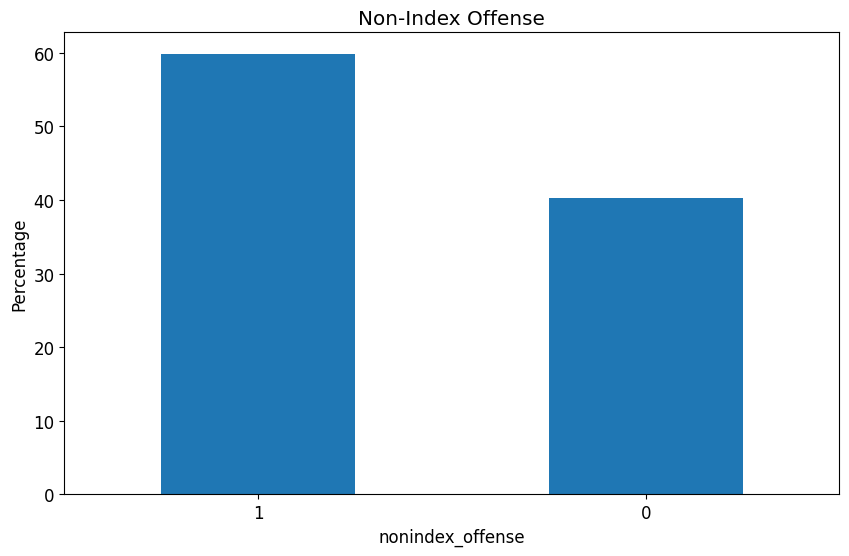

In [31]:
# Categorical column frequency
# Returns counts of unique values in descending order (first element is the most frequently-occurring element)
# Note: Excludes NA values by default
value_counts_func(chicago_crime, 'nonindex_offense', bar=True, title='Non-Index Offense')

In [32]:
# Compute a frequency table of two factors
# Builtin-Styles - https://pandas.pydata.org/pandas-docs/stable/style.html
orange = sns.light_palette('orange', as_cmap=True)
pd.crosstab(chicago_crime.index_offense.fillna(' NaN'), chicago_crime.nonindex_offense.fillna(' NaN'), margins=True, margins_name='Total', dropna=False).style.background_gradient(cmap=orange)

nonindex_offense,0,1,Total
index_offense,,,
0,67417,4110316,4177733
1,2698404,0,2698404
Total,2765821,4110316,6876137


Note: There are 67,417 records that are not consistent with the Index/Non-Index offense indicators as defined.

The following `iucr` codes are not contained in the CSV files as described above.

In [33]:
chicago_crime[(chicago_crime.index_offense == 0) & (chicago_crime.nonindex_offense == 0)].iucr.value_counts(dropna=False)

iucr
0840    44531
0841    15206
0843     2955
0842     2901
0499     1546
5008      189
1581       72
5005        6
5013        5
3961        4
9901        1
0830        1
Name: count, dtype: int64

In [34]:
# Return DataFrame with duplicate rows removed, optionally only considering certain columns
chicago_crime[['iucr', 'index_offense', 'nonindex_offense', 'primary_type', 'description']][(chicago_crime.index_offense == 0) & (chicago_crime.nonindex_offense == 0)].drop_duplicates().sort_values(by='iucr')

,iucr,index_offense,nonindex_offense,primary_type,description
11793,0499,0,0,BATTERY,AGGRAVATED DOMESTIC BATTERY
414873,0830,0,0,THEFT,THEFT RETAIL
73281,0840,0,0,THEFT,FINANCIAL ID THEFT: OVER $300
2482,0841,0,0,THEFT,FINANCIAL ID THEFT:$300 &UNDER
5426,0842,0,0,THEFT,AGG: FINANCIAL ID THEFT
632,0843,0,0,THEFT,ATTEMPT FINANCIAL IDENTITY THEFT
7559,1581,0,0,SEX OFFENSE,NON-CONSENSUAL DISSEMINATION PRIVATE SEXUAL IM...
1719493,3961,0,0,INTIMIDATION,INTIMIDATION OF LAW ENFORCEMENT OFFICIAL
625532,5005,0,0,SEX OFFENSE,ATT AGG CRIM SEXUAL ABUSE
5444,5008,0,0,OTHER OFFENSE,FIREARM REGISTRATION VIOLATION


The [Chicago Police Department CLEARMAP Crime Summary](http://gis.chicagopolice.org/clearmap_crime_sums/crime_types.html#N04A) webpage was referenced to see whether the above IUCR codes could be categorized into Index/Non-Index indicators.

In [35]:
# Return elements, either from `x` or `y`, depending on `condition`
chicago_crime['iucr_index_offense_update'] = np.where(chicago_crime.iucr.isin(['0499', '0830', '0840', '0841', '0842', '0843', '9901']), 1, 0)

In [36]:
# Categorical column frequency
# Returns counts of unique values in descending order (first element is the most frequently-occurring element)
# Note: Excludes NA values by default
value_counts_func(chicago_crime, 'iucr_index_offense_update', bar=False)

iucr_index_offense_update,counts,percentage
0,6808996,99.02
1,67141,0.98


In [37]:
# Return elements, either from `x` or `y`, depending on `condition`
chicago_crime['iucr_nonindex_offense_update'] = np.where(chicago_crime.iucr.isin(['1581', '3961', '5005', '5008', '5013']), 1, 0)

In [38]:
# Categorical column frequency
# Returns counts of unique values in descending order (first element is the most frequently-occurring element)
# Note: Excludes NA values by default
value_counts_func(chicago_crime, 'iucr_nonindex_offense_update', bar=False)

iucr_nonindex_offense_update,counts,percentage
0,6875861,100.00
1,276,0.00


`index_offense` values will be updated for records that were flagged by `iucr_index_offense_update`.

In [39]:
# Return elements, either from `x` or `y`, depending on `condition`
chicago_crime['index_offense'] = np.where(chicago_crime.iucr_index_offense_update == 1, 1, chicago_crime.index_offense)

# Remove columns by specifying directly column names
# Note: inplace=True changes the original DataFrame
chicago_crime.drop(columns=['iucr_index_offense_update'], inplace=True)

`nonindex_offense` values will be updated for records that were flagged by `iucr_nonindex_offense_update`.

In [40]:
# Return elements, either from `x` or `y`, depending on `condition`
chicago_crime['nonindex_offense'] = np.where(chicago_crime.iucr_nonindex_offense_update == 1, 1, chicago_crime.nonindex_offense)

# Remove columns by specifying directly column names
# Note: inplace=True changes the original DataFrame
chicago_crime.drop(columns=['iucr_nonindex_offense_update'], inplace=True)

In [41]:
# Compute a frequency table of two factors
# Builtin-Styles - https://pandas.pydata.org/pandas-docs/stable/style.html
orange = sns.light_palette('orange', as_cmap=True)
pd.crosstab(chicago_crime.index_offense.fillna(' NaN'), chicago_crime.nonindex_offense.fillna(' NaN'), margins=True, margins_name='Total', dropna=False).style.background_gradient(cmap=orange)

nonindex_offense,0,1,Total
index_offense,,,
0,0,4110592,4110592
1,2765545,0,2765545
Total,2765545,4110592,6876137


index_offense,counts,percentage
0,4110592,59.78
1,2765545,40.22


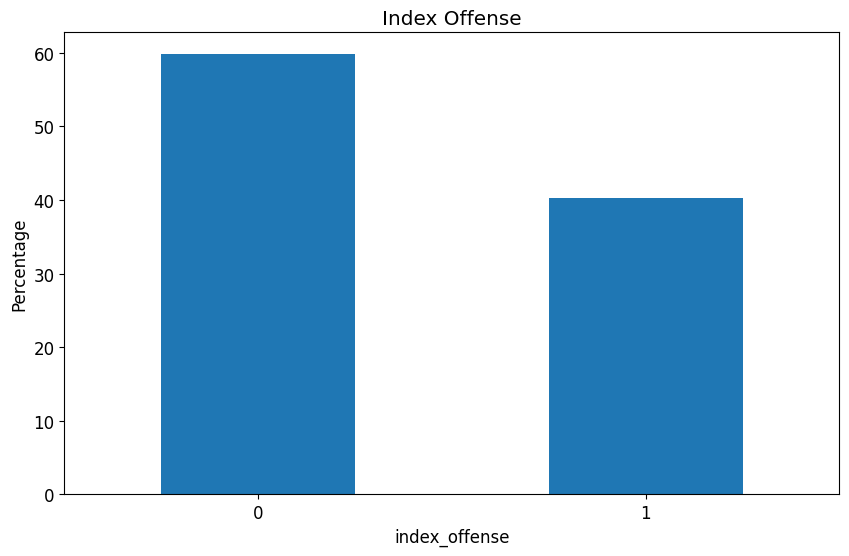

In [42]:
# Categorical column frequency
# Returns counts of unique values in descending order (first element is the most frequently-occurring element)
# Note: Excludes NA values by default
value_counts_func(chicago_crime, 'index_offense', bar=True, title='Index Offense')

nonindex_offense,counts,percentage
1,4110592,59.78
0,2765545,40.22


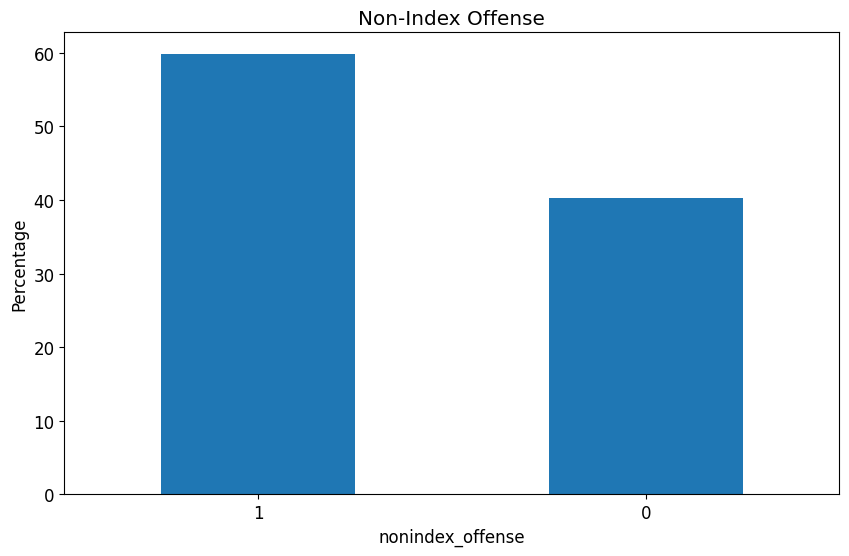

In [43]:
# Categorical column frequency
# Returns counts of unique values in descending order (first element is the most frequently-occurring element)
# Note: Excludes NA values by default
value_counts_func(chicago_crime, 'nonindex_offense', bar=True, title='Non-Index Offense')

Note: `description` is a secondary description of the IUCR code, a subcategory of the primary description. `primary_type`, the primary description, will be used instead for exploring data.

In [44]:
# Categorical column frequency
# Returns counts of unique values in descending order (first element is the most frequently-occurring element)
# Note: Excludes NA values by default
value_counts_func(chicago_crime, 'description', bar=False)

description,counts,percentage
SIMPLE,810859,11.79
$500 AND UNDER,557704,8.11
DOMESTIC BATTERY SIMPLE,528876,7.69
TO VEHICLE,380963,5.54
TO PROPERTY,361146,5.25
OVER $500,355377,5.17
POSS: CANNABIS 30GMS OR LESS,277353,4.03
FORCIBLE ENTRY,265849,3.87
AUTOMOBILE,250413,3.64
FROM BUILDING,232402,3.38


In [45]:
# Categorical column frequency
# Returns counts of unique values in descending order (first element is the most frequently-occurring element)
# Note: Excludes NA values by default
value_counts_func(chicago_crime, 'location_description', bar=False)

location_description,counts,percentage
STREET,1798094,26.15
RESIDENCE,1164770,16.94
APARTMENT,715533,10.41
SIDEWALK,674237,9.81
OTHER,261800,3.81
PARKING LOT/GARAGE(NON.RESID.),197412,2.87
ALLEY,153088,2.23
"SCHOOL, PUBLIC, BUILDING",144339,2.10
RESIDENCE-GARAGE,133048,1.93
SMALL RETAIL STORE,122737,1.78


#### `location_description` values that were less than 1% of the distribution will be combined into the 'OTHER' group and a new variable will be creatd as `location_description_cat`.

In [46]:
# Return elements, either from `x` or `y`, depending on `condition`
gte_1pct = ['STREET', 'RESIDENCE', 'APARTMENT', 'SIDEWALK', 'OTHER', 'PARKING LOT/GARAGE(NON.RESID.)', 'ALLEY',
            'SCHOOL, PUBLIC, BUILDING', 'RESIDENCE-GARAGE', 'SMALL RETAIL STORE', 'RESIDENCE PORCH/HALLWAY',
            'VEHICLE NON-COMMERCIAL', 'RESTAURANT', 'GROCERY FOOD STORE', 'DEPARTMENT STORE', 'GAS STATION',
            'RESIDENTIAL YARD (FRONT/BACK)']
chicago_crime['location_description_gte_1pct'] = np.where(chicago_crime.location_description.isin(gte_1pct), 1, 0)

In [47]:
# Categorical column frequency
# Returns counts of unique values in descending order (first element is the most frequently-occurring element)
# Note: Excludes NA values by default
value_counts_func(chicago_crime, 'location_description_gte_1pct', bar=False)

location_description_gte_1pct,counts,percentage
1,6025583,87.63
0,850554,12.37


In [48]:
# Return elements, either from `x` or `y`, depending on `condition`
chicago_crime['location_description_cat'] = np.where(chicago_crime.location_description_gte_1pct == 0, 'OTHER', chicago_crime.location_description)

# Remove columns by specifying directly column names
# Note: inplace=True changes the original DataFrame
chicago_crime.drop(columns=['location_description_gte_1pct'], inplace=True)

In [49]:
# Categorical column frequency
# Returns counts of unique values in descending order (first element is the most frequently-occurring element)
# Note: Excludes NA values by default
value_counts_func(chicago_crime, 'location_description_cat', bar=False)

location_description_cat,counts,percentage
STREET,1798094,26.15
RESIDENCE,1164770,16.94
OTHER,1112354,16.18
APARTMENT,715533,10.41
SIDEWALK,674237,9.81
PARKING LOT/GARAGE(NON.RESID.),197412,2.87
ALLEY,153088,2.23
"SCHOOL, PUBLIC, BUILDING",144339,2.10
RESIDENCE-GARAGE,133048,1.93
SMALL RETAIL STORE,122737,1.78


#### Create indicator (1/0) for whether an arrest was made.

In [50]:
# Categorical column frequency
# Returns counts of unique values in descending order (first element is the most frequently-occurring element)
# Note: Excludes NA values by default
value_counts_func(chicago_crime, 'arrest', bar=False)

arrest,counts,percentage
False,4976643,72.38
True,1899494,27.62


In [51]:
# Map values of Series using input correspondence (i.e., map existing input values to new outputs values)
chicago_crime['arrest'] = chicago_crime.arrest.map({False:0, True:1})

arrest,counts,percentage
0,4976643,72.38
1,1899494,27.62


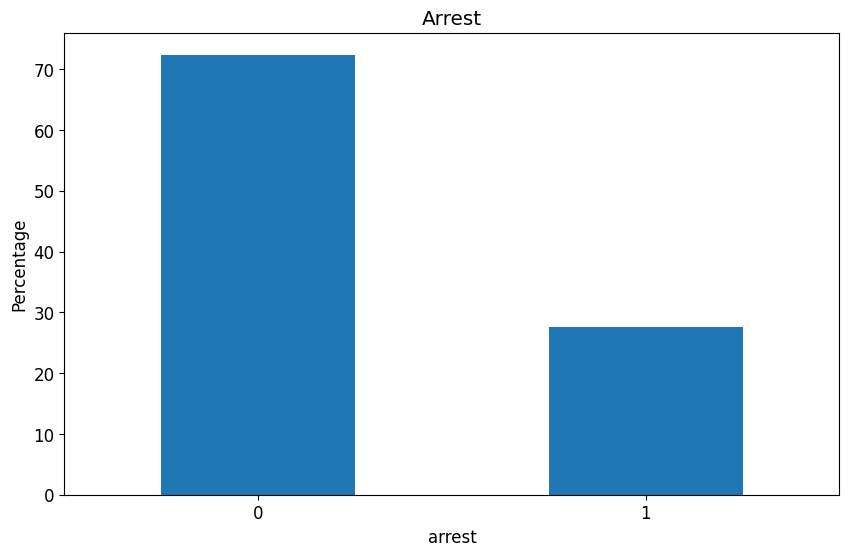

In [52]:
# Categorical column frequency
# Returns counts of unique values in descending order (first element is the most frequently-occurring element)
# Note: Excludes NA values by default
value_counts_func(chicago_crime, 'arrest', bar=True, title='Arrest')

#### Create indicator (1/0) for whether the incident was domestic-related.

In [53]:
# Categorical column frequency
# Returns counts of unique values in descending order (first element is the most frequently-occurring element)
# Note: Excludes NA values by default
value_counts_func(chicago_crime, 'domestic', bar=False)

domestic,counts,percentage
False,5969459,86.81
True,906678,13.19


In [54]:
# Map values of Series using input correspondence (i.e., map existing input values to new outputs values)
chicago_crime['domestic'] = chicago_crime.domestic.map({False:0, True:1})

domestic,counts,percentage
0,5969459,86.81
1,906678,13.19


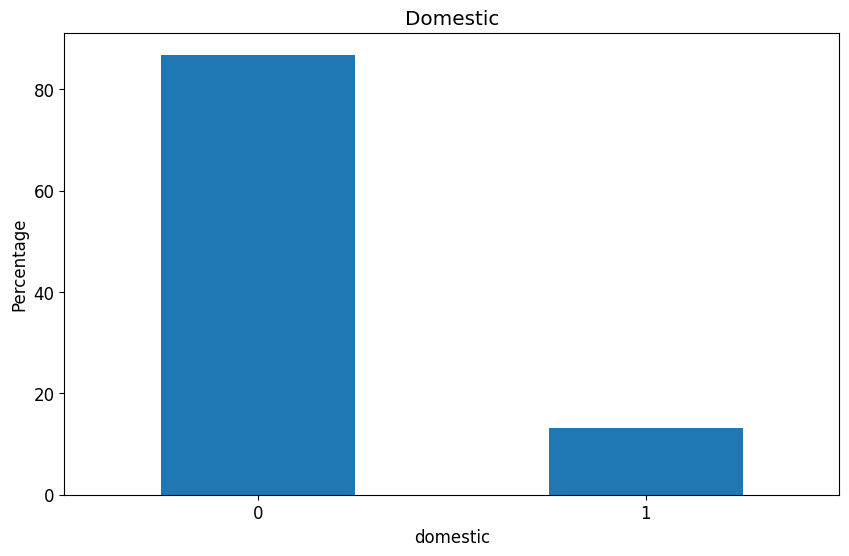

In [55]:
# Categorical column frequency
# Returns counts of unique values in descending order (first element is the most frequently-occurring element)
# Note: Excludes NA values by default
value_counts_func(chicago_crime, 'domestic', bar=True, title='Domestic')

In [56]:
# Categorical column frequency
# Returns counts of unique values in descending order (first element is the most frequently-occurring element)
# Note: Excludes NA values by default
value_counts_func(chicago_crime, 'beat', bar=False)

beat,counts,percentage
423,53538,0.78
421,52756,0.77
624,47655,0.69
1533,46488,0.68
511,46424,0.68
1112,46175,0.67
823,45835,0.67
1834,45188,0.66
414,43428,0.63
1522,43356,0.63


Note: `beat` 430 and 310 have very low frequencies. After examining [Chicago Data Portal: Current police beat boundaries](https://data.cityofchicago.org/Public-Safety/Boundaries-Police-Beats-current-/aerh-rz74), these don't appear to be active beat numbers.

#### Drop low frequency `beat` observations.

In [57]:
# Return elements, either from `x` or `y`, depending on `condition`
chicago_crime['beat_low_freq'] = np.where(chicago_crime.beat.isin([430, 310]), 1, 0)

In [58]:
# Categorical column frequency
# Returns counts of unique values in descending order (first element is the most frequently-occurring element)
# Note: Excludes NA values by default
value_counts_func(chicago_crime, 'beat_low_freq', bar=False)

beat_low_freq,counts,percentage
0,6876113,100.00
1,24,0.00


In [59]:
# Excluding low frequency values
chicago_crime = chicago_crime[chicago_crime.beat_low_freq == 0]

# Remove columns by specifying directly column names
# Note: inplace=True changes the original DataFrame
chicago_crime.drop(columns=['beat_low_freq'], inplace=True)

In [60]:
# Return the number of rows and columns (dimensionality) of the DataFrame
print('Rows: {}, Cols: {}'.format(chicago_crime.shape[0], chicago_crime.shape[1]))

Rows: 6876113, Cols: 23


In [61]:
# Categorical column frequency
# Returns counts of unique values in descending order (first element is the most frequently-occurring element)
# Note: Excludes NA values by default
value_counts_func(chicago_crime, 'district', bar=False)

district,counts,percentage
8.000000,466921,6.79
11.000000,441052,6.41
7.000000,405315,5.89
6.000000,396763,5.77
25.000000,396111,5.76
4.000000,389519,5.66
3.000000,349128,5.08
9.000000,340932,4.96
12.000000,336816,4.90
2.000000,325980,4.74


Can the 47 NaN values from `district` be filled in based on `beat` number?

Get length of `beat` column values.

In [62]:
chicago_crime['beat_length'] = chicago_crime.beat.astype(str).apply(len)

In [63]:
# Categorical column frequency
# Returns counts of unique values in descending order (first element is the most frequently-occurring element)
# Note: Excludes NA values by default
value_counts_func(chicago_crime, 'beat_length', bar=False)

beat_length,counts,percentage
4,3739548,54.38
3,3136565,45.62


Extract 1st number of `beat` if `beat_length` = 3; Extract 1st and 2nd number of `beat` if `beat_length` = 4.

In [64]:
# Return elements, either from `x` or `y`, depending on `condition`
chicago_crime['district_update'] = np.where(chicago_crime.beat_length == 3, chicago_crime.beat.astype(str).str[:1], chicago_crime.beat.astype(str).str[:2])

# Convert the data type of a column to a specified data type
chicago_crime['district_update'] = chicago_crime.district_update.astype('float')

In [65]:
# Return elements, either from `x` or `y`, depending on `condition`
chicago_crime['district'] = np.where(chicago_crime.district.isnull(), chicago_crime.district_update, chicago_crime.district)

In [66]:
# Categorical column frequency
# Returns counts of unique values in descending order (first element is the most frequently-occurring element)
# Note: Excludes NA values by default
value_counts_func(chicago_crime, 'district', bar=False)

district,counts,percentage
8.000000,466923,6.79
11.000000,441056,6.41
7.000000,405319,5.89
6.000000,396764,5.77
25.000000,396117,5.76
4.000000,389520,5.66
3.000000,349131,5.08
9.000000,340933,4.96
12.000000,336816,4.90
2.000000,325981,4.74


Note: `district`s 21 and 13 have very low frequencies. After examining [Chicago Data Portal: Current police district boundaries](https://data.cityofchicago.org/Public-Safety/Boundaries-Police-Districts-current-/fthy-xz3r), these don't appear to be active district numbers.

#### Drop inactive `district` observations

In [67]:
# Return elements, either from `x` or `y`, depending on `condition`
chicago_crime['district_inactive'] = np.where(chicago_crime.district.isin([21, 13]), 1, 0)

In [68]:
# Categorical column frequency
# Returns counts of unique values in descending order (first element is the most frequently-occurring element)
# Note: Excludes NA values by default
value_counts_func(chicago_crime, 'district_inactive', bar=False)

district_inactive,counts,percentage
0,6876107,100.00
1,6,0.00


In [69]:
# Excluding low frequency values
chicago_crime = chicago_crime[chicago_crime.district_inactive == 0]

# Remove columns by specifying directly column names
# Note: inplace=True changes the original DataFrame
chicago_crime.drop(columns=['district_inactive'], inplace=True)

In [70]:
# Return the number of rows and columns (dimensionality) of the DataFrame
print('Rows: {}, Cols: {}'.format(chicago_crime.shape[0], chicago_crime.shape[1]))

Rows: 6876107, Cols: 25


Note: `district` 31 has low frequency.  It does appear in the file above. However, it doesn't appear on the [Chicago Police Department: Districts](https://home.chicagopolice.org/community/districts/) webpage and isn't an active district.

In [71]:
chicago_crime[chicago_crime.district == 31.0]

,date,block,iucr,primary_type,description,location_description,arrest,domestic,beat,district,...,year,updated_on,latitude,longitude,lat_long,index_offense,nonindex_offense,location_description_cat,beat_length,district_update
5937,2012-05-21,064XX N MANNHEIM RD,2022,NARCOTICS,POSS: COCAINE,STREET,1,0,1654,31.0,...,2012,2018-02-09 15:44:29+00:00,41.99572241,-87.884462932,"(41.99572241, -87.884462932)",0,1,STREET,4,16.0
8684,2009-01-28,097XX S AVENUE L,2012,NARCOTICS,MANU/DELIVER:COCAINE,VEHICLE NON-COMMERCIAL,1,0,432,31.0,...,2009,2018-02-28 15:56:25+00:00,41.719041877,-87.536494149,"(41.719041877, -87.536494149)",0,1,VEHICLE NON-COMMERCIAL,3,4.0
9834,2009-02-17,099XX S EWING AVE,2012,NARCOTICS,MANU/DELIVER:COCAINE,VEHICLE NON-COMMERCIAL,1,0,432,31.0,...,2009,2016-02-04 06:33:39+00:00,41.71527921,-87.535277004,"(41.71527921, -87.535277004)",0,1,VEHICLE NON-COMMERCIAL,3,4.0
14021,2008-05-13,052XX N HARLEM AVE,2015,NARCOTICS,MANU/DELIVER: HALLUCINOGEN,OTHER,1,0,1613,31.0,...,2008,2018-02-28 15:56:25+00:00,41.975874105,-87.807052779,"(41.975874105, -87.807052779)",0,1,OTHER,4,16.0
26430,2018-03-27,064XX N MANNHEIM RD,0460,BATTERY,SIMPLE,STREET,0,0,1654,31.0,...,2018,2018-05-04 15:51:04+00:00,41.99572241,-87.884462932,"(41.99572241, -87.884462932)",0,1,STREET,4,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6858378,2016-10-08,115XX W TOUHY AVE,0890,THEFT,FROM BUILDING,AIRPORT BUILDING NON-TERMINAL - NON-SECURE AREA,0,0,1654,31.0,...,2016,2018-02-10 15:50:01+00:00,42.008885217,-87.906473187,"(42.008885217, -87.906473187)",1,0,OTHER,4,16.0
6858470,2013-07-05,115XX W TOUHY AVE,0890,THEFT,FROM BUILDING,COMMERCIAL / BUSINESS OFFICE,0,0,1654,31.0,...,2013,2018-02-10 15:50:01+00:00,42.008885217,-87.906473187,"(42.008885217, -87.906473187)",1,0,OTHER,4,16.0
6859274,2011-02-02,005XX W OHARE ST,1310,CRIMINAL DAMAGE,TO PROPERTY,AIRPORT/AIRCRAFT,0,0,1654,31.0,...,2011,2018-02-09 15:44:29+00:00,41.965057367,-87.879953326,"(41.965057367, -87.879953326)",0,1,OTHER,4,16.0
6859597,2010-01-14,005XX W OHARE ST,1320,CRIMINAL DAMAGE,TO VEHICLE,AIRPORT EXTERIOR - NON-SECURE AREA,0,0,1654,31.0,...,2010,2018-02-10 15:50:01+00:00,41.965057367,-87.879953326,"(41.965057367, -87.879953326)",0,1,OTHER,4,16.0


#### Use `beat` to supply the `district` for inactive district 31.

In [72]:
# Return elements, either from `x` or `y`, depending on `condition`
chicago_crime['district'] = np.where(chicago_crime.district == 31.0, chicago_crime.district_update, chicago_crime.district)

# Remove columns by specifying directly column names
# Note: inplace=True changes the original DataFrame
chicago_crime.drop(columns=['beat_length', 'district_update'], inplace=True)

In [73]:
# Categorical column frequency
# Returns counts of unique values in descending order (first element is the most frequently-occurring element)
# Note: Excludes NA values by default
value_counts_func(chicago_crime, 'district', bar=False)

district,counts,percentage
8.000000,466929,6.79
11.000000,441061,6.41
7.000000,405321,5.89
6.000000,396764,5.77
25.000000,396125,5.76
4.000000,389535,5.67
3.000000,349143,5.08
9.000000,340934,4.96
12.000000,336816,4.90
2.000000,325981,4.74


In [74]:
# Categorical column frequency
# Returns counts of unique values in descending order (first element is the most frequently-occurring element)
# Note: Excludes NA values by default
value_counts_func(chicago_crime, 'ward', bar=False)

ward,counts,percentage
nan,614818,8.94
28.000000,286431,4.17
42.000000,254297,3.70
24.000000,246592,3.59
2.000000,240122,3.49
27.000000,228666,3.33
17.000000,208918,3.04
20.000000,206557,3.00
6.000000,202647,2.95
3.000000,191472,2.78


In [75]:
# Find the unique values in the column and sort
np.sort(chicago_crime.ward.unique())

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39.,
       40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50., nan])

In [76]:
# Categorical column frequency
# Returns counts of unique values in descending order (first element is the most frequently-occurring element)
# Note: Excludes NA values by default
value_counts_func(chicago_crime, 'community_area', bar=False)

community_area,counts,percentage
nan,613491,8.92
25.000000,398032,5.79
8.000000,215160,3.13
43.000000,204476,2.97
23.000000,197935,2.88
28.000000,184857,2.69
24.000000,184852,2.69
67.000000,183831,2.67
29.000000,181238,2.64
71.000000,177379,2.58


In [77]:
# Find the unique values in the column and sort
np.sort(chicago_crime.community_area.unique())

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
       39., 40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51.,
       52., 53., 54., 55., 56., 57., 58., 59., 60., 61., 62., 63., 64.,
       65., 66., 67., 68., 69., 70., 71., 72., 73., 74., 75., 76., 77.,
       nan])

Note: `community_area` 0 is not a valid community area. However, it doesn't apprear as though this value can be mapped to a valid value after exploring the data.

In [78]:
chicago_crime[['iucr', 'primary_type', 'description', 'location_description', 'arrest', 'domestic',
               'beat', 'district', 'ward', 'community_area', 'fbi_code']][chicago_crime.community_area == 0.0]

,iucr,primary_type,description,location_description,arrest,domestic,beat,district,ward,community_area,fbi_code
5937,2022,NARCOTICS,POSS: COCAINE,STREET,1,0,1654,16.0,NaN,0.0,18
6974,1152,DECEPTIVE PRACTICE,ILLEGAL USE CASH CARD,BANK,0,0,1614,16.0,41.0,0.0,11
18883,1206,DECEPTIVE PRACTICE,"THEFT BY LESSEE,MOTOR VEH",COMMERCIAL / BUSINESS OFFICE,0,0,1651,16.0,41.0,0.0,11
26430,0460,BATTERY,SIMPLE,STREET,0,0,1654,16.0,NaN,0.0,08B
28093,0460,BATTERY,SIMPLE,CTA PLATFORM,0,0,1614,16.0,41.0,0.0,08B
...,...,...,...,...,...,...,...,...,...,...,...
5269328,2820,OTHER OFFENSE,TELEPHONE THREAT,RESIDENCE,0,1,811,8.0,23.0,0.0,26
5270044,2820,OTHER OFFENSE,TELEPHONE THREAT,RESIDENCE,0,0,1614,16.0,41.0,0.0,26
5272386,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,0,0,1651,16.0,41.0,0.0,26
5273110,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,COMMERCIAL / BUSINESS OFFICE,0,0,1651,16.0,41.0,0.0,26


Note: Both `ward` and `community_area` have 8.9% missing values.  It does not appear as though these values can be filled in from other information after exploring the data.  They will not be included in the modeling as these observations would be automatically dropped.

fbi_code,counts,percentage
06,1448226,21.06
08B,1074130,15.62
14,784261,11.41
26,699225,10.17
18,674890,9.82
05,392856,5.71
08A,322820,4.69
07,318906,4.64
03,259579,3.78
11,230890,3.36


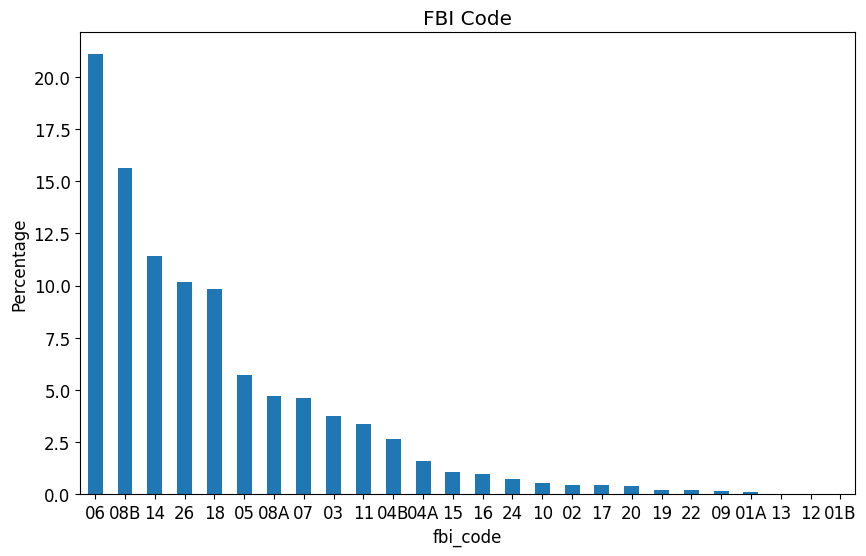

In [79]:
# Categorical column frequency
# Returns counts of unique values in descending order (first element is the most frequently-occurring element)
# Note: Excludes NA values by default
value_counts_func(chicago_crime, 'fbi_code', bar=True, title='FBI Code')

In [80]:
# Compute a frequency table of two factors
# Builtin-Styles - https://pandas.pydata.org/pandas-docs/stable/style.html
#orange = sns.light_palette('orange', as_cmap=True)
#pd.crosstab(chicago_crime.iucr.fillna(' NaN'), chicago_crime.fbi_code.fillna(' NaN'), margins=True, margins_name='Total', dropna=False).style.background_gradient(cmap=orange)

Note: `iucr` codes are derived from the crime classification code (`fbi_code`).  Thus, `fbi_code` will not be used in the modeling.

year,counts,percentage
2002,486756,7.08
2001,485750,7.06
2003,475944,6.92
2004,469381,6.83
2005,453716,6.60
2006,448112,6.52
2007,437010,6.36
2008,427055,6.21
2009,392694,5.71
2010,370319,5.39


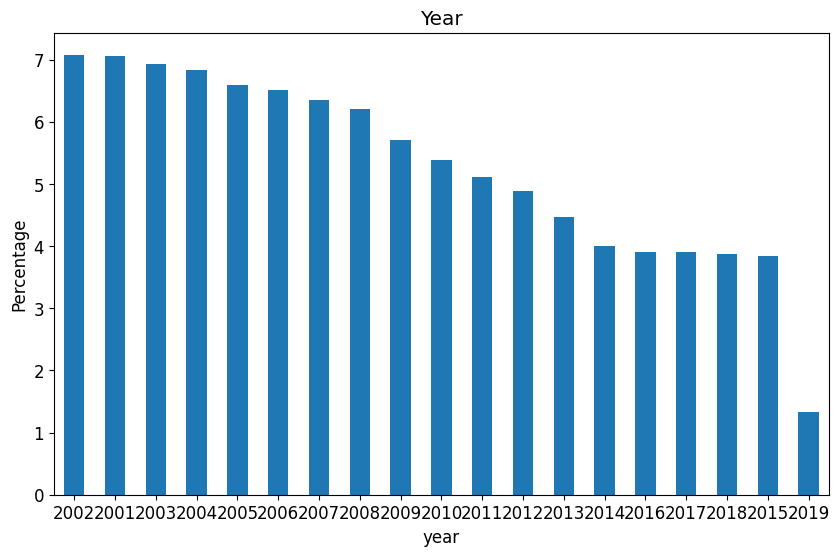

In [81]:
# Categorical column frequency
# Returns counts of unique values in descending order (first element is the most frequently-occurring element)
# Note: Excludes NA values by default
value_counts_func(chicago_crime, 'year', bar=True, title='Year')

### Summarize the DataFrame

In [82]:
# Describe numeric columns
# Generates descriptive summary statistics of the central tendency, dispersion, and shape of the distribution
# Note: By default only numeric (int64) fields are returned
#       Excludes "NaN" (missing) values
# Remove columns by specifying directly column names
# Note: inplace=True changes the original DataFrame
round(chicago_crime.drop(columns=['beat', 'district', 'ward', 'community_area']).describe(), 3)

,date,arrest,domestic,x_coordinate,y_coordinate,year,latitude,longitude,index_offense,nonindex_offense
count,6876107,"6,876,107.0","6,876,107.0","6,811,139.0","6,811,139.0","6,876,107.0","6,811,139.0","6,811,139.0","6,876,107.0","6,876,107.0"
mean,2009-01-04 16:32:57.238339328,0.276,0.132,"1,164,523.23","1,885,726.556","2,008.514",41.842,-87.672,0.402,0.598
min,2001-01-01 00:00:00,0.0,0.0,0.0,0.0,"2,001.0",36.619,-91.687,0.0,0.0
25%,2004-07-30 00:00:00,0.0,0.0,"1,152,936.0","1,859,189.0","2,004.0",41.769,-87.714,0.0,0.0
50%,2008-06-09 00:00:00,0.0,0.0,"1,166,001.0","1,890,613.0","2,008.0",41.856,-87.666,0.0,1.0
75%,2013-01-28 00:00:00,1.0,0.0,"1,176,352.0","1,909,288.0","2,013.0",41.907,-87.628,1.0,1.0
max,2019-05-19 00:00:00,1.0,1.0,"1,205,119.0","1,951,622.0","2,019.0",42.023,-87.525,1.0,1.0
std,NaN,0.447,0.338,"17,155.392","32,686.631",5.156,0.09,0.062,0.49,0.49


Note: Exploring `x_coordinate` values.  The min value of 0.0 is quite far off from the rest of the values and may be an error.

In [83]:
chicago_crime[['x_coordinate', 'y_coordinate', 'latitude', 'longitude']][(chicago_crime.x_coordinate == 0.0)]

,x_coordinate,y_coordinate,latitude,longitude
2798,0.0,0.0,36.619446395,-91.686565684
5492,0.0,0.0,36.619446395,-91.686565684
16979,0.0,0.0,36.619446395,-91.686565684
81795,0.0,0.0,36.619446395,-91.686565684
109867,0.0,0.0,36.619446395,-91.686565684
...,...,...,...,...
6584599,0.0,0.0,36.619446395,-91.686565684
6629085,0.0,0.0,36.619446395,-91.686565684
6663765,0.0,0.0,36.619446395,-91.686565684
6807327,0.0,0.0,36.619446395,-91.686565684


In [84]:
chicago_crime[['x_coordinate', 'y_coordinate', 'latitude', 'longitude']][(chicago_crime.x_coordinate == 0.0)].count()

x_coordinate    161
y_coordinate    161
latitude        161
longitude       161
dtype: int64

In [85]:
# Describe numeric columns
# Generates descriptive summary statistics of the central tendency, dispersion, and shape of the distribution
# Note: By default only numeric (int64) fields are returned
#       Excludes "NaN" (missing) values
# Remove multiple columns
# Note: axis=0 for rows, 1 for columns
round(chicago_crime[['x_coordinate', 'y_coordinate', 'latitude', 'longitude']][chicago_crime.x_coordinate != 0.0].describe(), 3)

,x_coordinate,y_coordinate,latitude,longitude
count,"6,810,978.0","6,810,978.0","6,810,978.0","6,810,978.0"
mean,"1,164,550.757","1,885,771.132",41.842,-87.672
std,"16,194.364","31,374.864",0.086,0.059
min,"1,092,706.0","1,813,894.0",41.645,-87.934
25%,"1,152,937.0","1,859,190.0",41.769,-87.714
50%,"1,166,001.0","1,890,615.0",41.856,-87.666
75%,"1,176,352.0","1,909,288.0",41.907,-87.628
max,"1,205,119.0","1,951,622.0",42.023,-87.525


Note: These values appear to be much more realistic.  The 161 records will be dropped.

In [86]:
# Excluding unrealistic x_coordinate, y_coordinate, latitude, longitude values
chicago_crime = chicago_crime[chicago_crime.x_coordinate != 0.0]

In [87]:
# Return the number of rows and columns (dimensionality) of the DataFrame
print('Rows: {}, Cols: {}'.format(chicago_crime.shape[0], chicago_crime.shape[1]))

Rows: 6875946, Cols: 23


In [88]:
# Describe object columns (e.g. categorical, strings, or timestamps)
# Generates descriptive summary statistics of the count, unique values, top values, and frequency
# Note: "top" is the most common value; "freq" is the most common value's frequency
#       Excludes "NaN" (missing) values
# Remove columns by specifying directly column names
# Note: inplace=True changes the original DataFrame
round(chicago_crime.drop(columns=['location_description', 'updated_on']).describe(include='object'), 3)

,block,iucr,primary_type,description,fbi_code,lat_long,location_description_cat
count,6875946,6875946,6875946,6875946,6875946,6810978,6875946
unique,60198,396,30,374,26,864017,17
top,100XX W OHARE ST,0820,THEFT,SIMPLE,06,"(41.976290414, -87.905227221)",STREET
freq,15362,557704,1448204,810840,1448204,13237,1798028


In [89]:
# Calculate the correlation matrix using the default method (Pearson correlation)
chicago_crime_correlations = chicago_crime[['x_coordinate', 'y_coordinate', 'latitude', 'longitude', 'year']].corr(method='pearson')
round(chicago_crime_correlations, 3)

,x_coordinate,y_coordinate,latitude,longitude,year
x_coordinate,1.0,-0.558,-0.56,1.0,0.002
y_coordinate,-0.558,1.0,1.0,-0.547,-0.003
latitude,-0.56,1.0,1.0,-0.55,-0.003
longitude,1.0,-0.547,-0.55,1.0,0.002
year,0.002,-0.003,-0.003,0.002,1.0


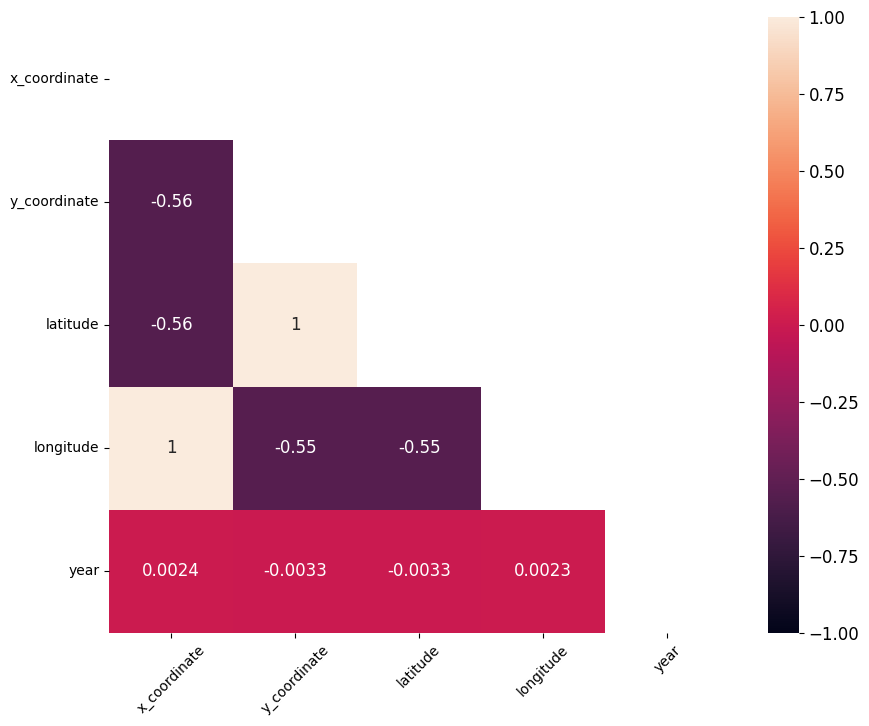

In [90]:
# Create a figure and a set of subplots
# Note: figsize: a tuple (width, height) in inches
fig, ax = plt.subplots(figsize=(10, 8));

# Return an array of zeros with the same shape and type as a given array
mask = np.zeros_like(chicago_crime_correlations, dtype=bool)
# Return the indices for the upper-triangle of array
mask[np.triu_indices_from(mask)] = True

# Plot the correlation matrix (color-encoded) using Seaborn's .heatmap() function
# Note: vmin, vmax: values to anchor the colormap, otherwise they are inferred from the data & other keyword arguments
#       annot: write the data value in each cell
ax = sns.heatmap(chicago_crime_correlations, vmin=-1, vmax=1, annot=True, mask=mask, ax=ax);

ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=10, rotation=45);
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=10, va='center', rotation=0);

plt.show();

Note: `latitude` is highly correlated with `y_coordinate`; `longitude` is highly correlated with `x_coordinate`.  `latitude` and `longitude` are measures of location and are basically measuring the same thing as `x_coordinate` and `y_coordinate`.  Thus, `x_coordinate` and `y_coordinate` will not be used.

#### Examine Latitude by Index Offense Groups

In [91]:
# For each group, describe var:
def groupby_describe_func(df, byvar, var, sortvar=''):
    return round(df.groupby(by=byvar)[var].describe().sort_values(by=[sortvar], ascending=False), 3)

In [92]:
# For each group, describe var:
groupby_describe_func(df=chicago_crime, byvar='index_offense', 
                      var='latitude', sortvar='mean')

,count,mean,std,min,25%,50%,75%,max
index_offense,,,,,,,,
1,"2,739,589.0",41.847,0.086,41.645,41.772,41.866,41.912,42.023
0,"4,071,389.0",41.839,0.086,41.645,41.767,41.85,41.903,42.023


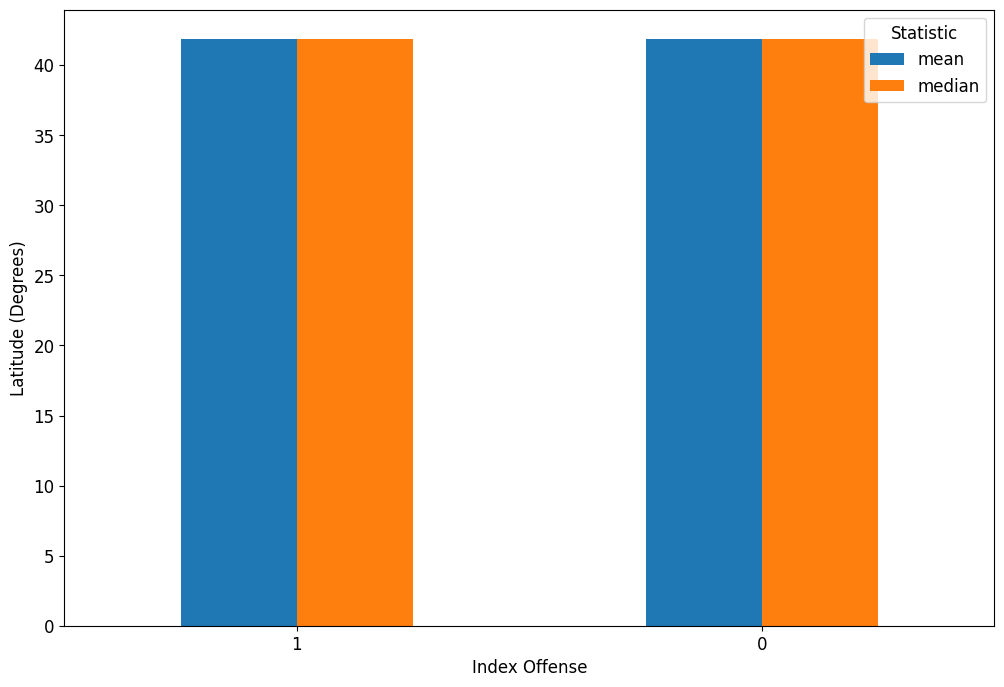

In [93]:
groupby_describe_func(df=chicago_crime, byvar='index_offense', 
                      var='latitude', sortvar='mean')[['mean', '50%']].head(10).plot(kind='bar');
plt.xticks(rotation='horizontal');
plt.xlabel('Index Offense');
plt.ylabel('Latitude (Degrees)');
plt.legend(title='Statistic', labels=('mean', 'median'), loc='upper right');

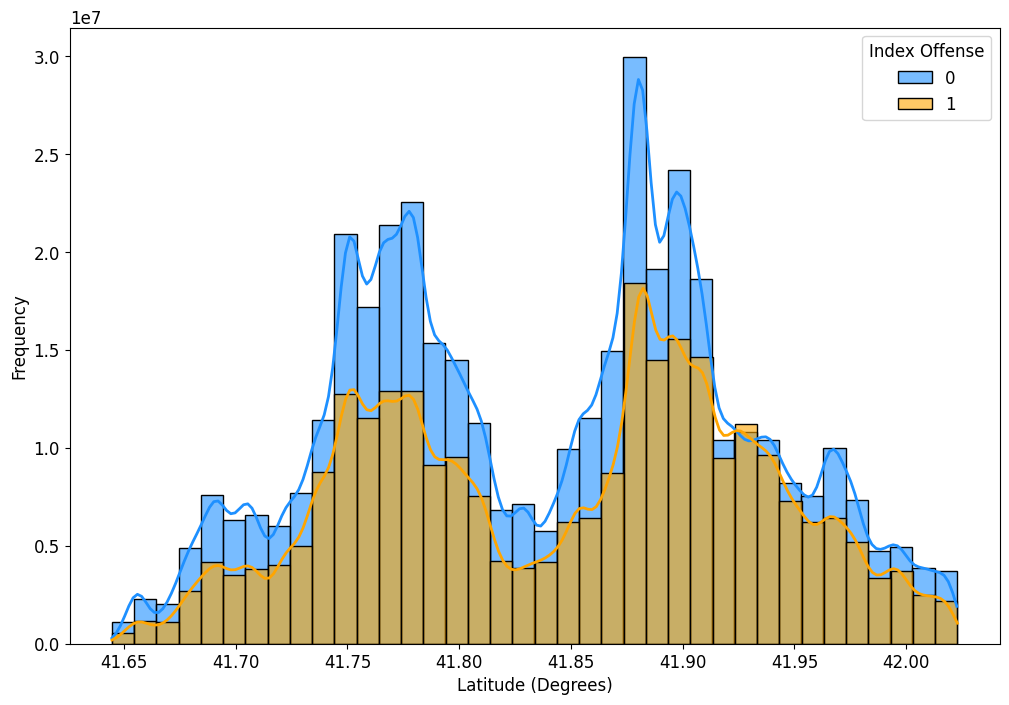

In [94]:
x1 = chicago_crime[(chicago_crime.latitude.notnull())].loc[chicago_crime.index_offense==0, 'latitude']
x2 = chicago_crime[(chicago_crime.latitude.notnull())].loc[chicago_crime.index_offense==1, 'latitude']

# Plot
kwargs = dict(line_kws={'linewidth': 2})

sns.histplot(x1,
             stat='frequency', # 'frequency' equivalent to 'count' when binwidth=1
             binwidth=0.01,
             #discrete=True,
             kde=True,
             color='dodgerblue',
             alpha=.6,
             label='0',
             **kwargs)
sns.histplot(x2,
             stat='frequency', # 'frequency' equivalent to 'count' when binwidth=1
             binwidth=0.01,
             #discrete=True,
             kde=True,
             color='orange',
             alpha=.6,
             label='1',
             **kwargs)
#plt.xlim(left, right)
plt.xlabel('Latitude (Degrees)')
plt.ylabel('Frequency')
plt.legend(title='Index Offense', loc='upper right');

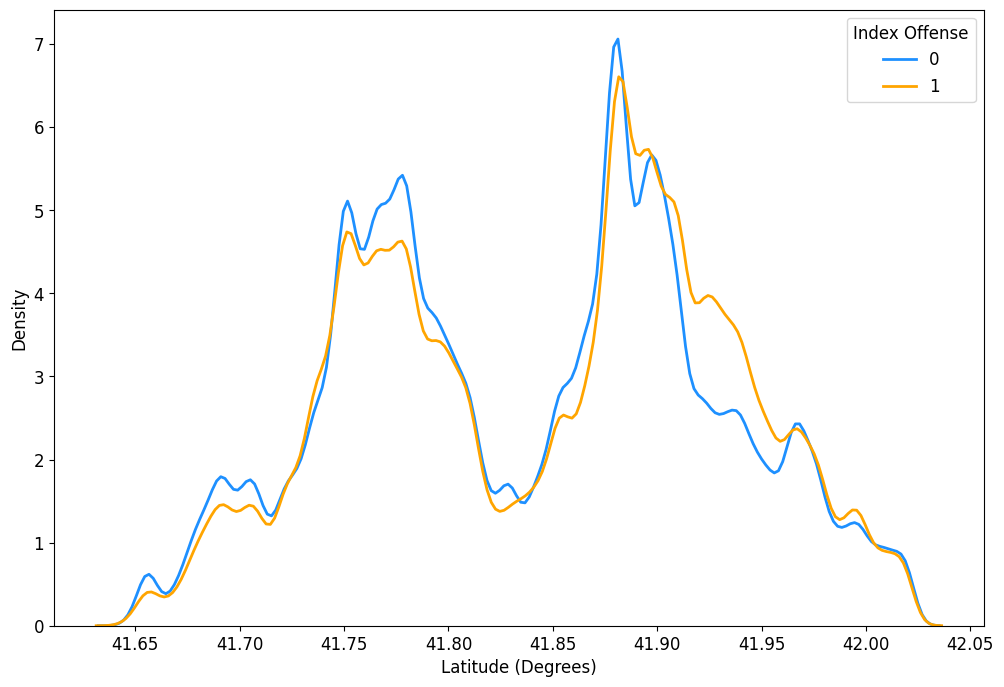

In [95]:
x1 = chicago_crime[(chicago_crime.latitude.notnull())].loc[chicago_crime.index_offense==0, 'latitude']
x2 = chicago_crime[(chicago_crime.latitude.notnull())].loc[chicago_crime.index_offense==1, 'latitude']

# Plot
sns.kdeplot(x1,
            color='dodgerblue',
            linewidth=2,
            label='0')
sns.kdeplot(x2,
            color='orange',
            linewidth=2,
            label='1')
#plt.xlim(left, right)
plt.xlabel('Latitude (Degrees)')
plt.ylabel('Density')
plt.legend(title='Index Offense', loc='upper right');

[Normality Tests](https://machinelearningmastery.com/a-gentle-introduction-to-normality-tests-in-python/)
- QQ Plot
- Shapiro-Wilk test

index_offense   
0              0    Figure(1200x800)
1              0    Figure(1200x800)
Name: latitude, dtype: object

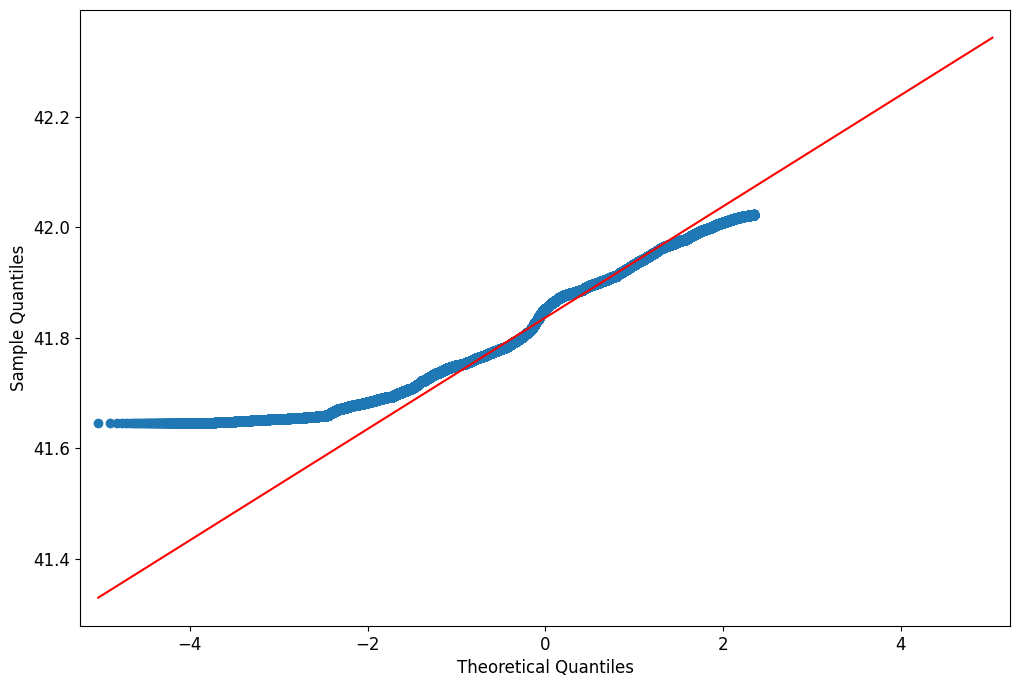

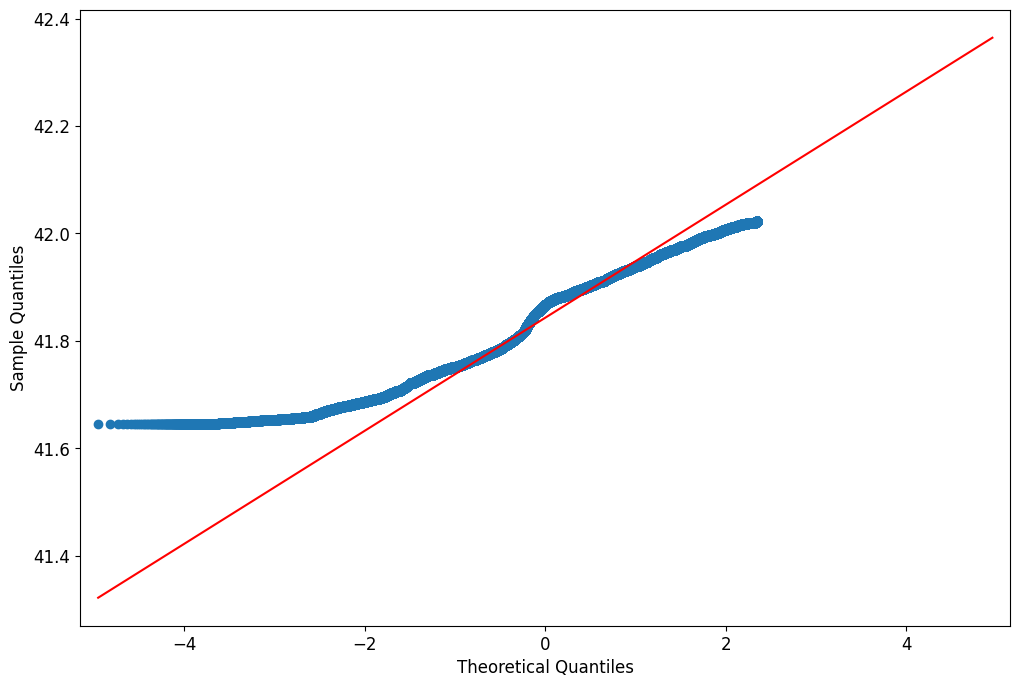

In [96]:
# Q-Q plot of the quantiles of x versus the quantiles/ppf of a distribution
# Note: dist: comparison distribution; the default is scipy.stats.distributions.norm (a standard normal)
#       line: options for the reference line to which the data is compared;
#             "45" - 45-degree line
#             "s" - standardized line, the expected order statistics are scaled by the standard deviation of the given sample and have the mean added to them
#             "r" - A regression line is fit
#             "q" - A line is fit through the quartile
chicago_crime.groupby(by='index_offense').latitude.apply(lambda x: pd.Series(sm.qqplot(x, line='q')))
#plt.show()

In [97]:
# Perform the Shapiro-Wilk test for normality
# The Shapiro-Wilk test tests the null hypothesis that the data was drawn from a normal distribution
# Note: p-value may not be accurate for N > 5000
sw_df = round(chicago_crime.groupby(by='index_offense').latitude \
        .apply(lambda x: pd.Series(stats.shapiro(x.dropna()), index=['W-statistic', 'p-value'])), 3)
print('Shapiro-Wilk test:')
print('H0: the sample has a Normal distribution \nHa: the sample does not have a Normal distribution\n')
print(sw_df)

/Users/yangweichle/myenv/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 4071389.
  res = hypotest_fun_out(*samples, **kwds)


Shapiro-Wilk test:
H0: the sample has a Normal distribution 
Ha: the sample does not have a Normal distribution

index_offense             
0              W-statistic   0.975
               p-value         0.0
1              W-statistic   0.969
               p-value         0.0
Name: latitude, dtype: float64


/Users/yangweichle/myenv/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 2739589.
  res = hypotest_fun_out(*samples, **kwds)


[Mann-Whitney U test](https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/)

In [98]:
# Compute the Mann-Whitney rank test on samples x and y
# Use only when the number of observation in each sample is > 20 and you have 2 independent samples of ranks
# This test corrects for ties and by default uses a continuity correction
# Note: alternative: defines the alternative hypothesis;
#                    'two-sided', 'less': one-sided, 'greater': one-sided
statistic, pvalue = stats.mannwhitneyu(*chicago_crime.dropna(subset=['latitude']).groupby(by='index_offense').latitude.apply(lambda x: list(x)),
                                       alternative='two-sided')
print('Mann-Whitney U test:')
print('U-statistic =', round(statistic, 3))
print('p-value     =', round(pvalue, 3))

Mann-Whitney U test:
U-statistic = 5264089145106.0
p-value     = 0.0


[Independent Two-Sample T-test](https://pythonfordatascience.org/independent-t-test-python/)

In [99]:
# Calculate the T-test for the means of *two independent* samples of scores
# Note: equal_var: if True (default), perform a standard independent 2 sample test that assumes equal population variances;
#                  if False, perform Welch's t-test, which does not assume equal population variance
#       nan_policy: defines how to handle when input contains nan. 'propagate' returns nan, 'raise' throws an error,
#                   'omit' performs the calculations ignoring nan values; default is 'propagate'
statistic, pvalue = stats.ttest_ind(*chicago_crime.groupby(by='index_offense').latitude.apply(lambda x: list(x)),
                                    equal_var=True, nan_policy='omit')
print('Independent Two-Sample t-test:')
print('t-statistic =', round(statistic, 3))
print('p-value     =', round(pvalue, 3))

Independent Two-Sample t-test:
t-statistic = -116.274
p-value     = 0.0


In [100]:
# Suppress specific FutureWarnings
import warnings
warnings.filterwarnings('ignore', category=FutureWarning, message="Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '.*' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.")

a = chicago_crime.groupby(by='index_offense').latitude.apply(lambda x: list(x))
a0 = pd.Series(a[0])
a1 = pd.Series(a[1])
descriptives, results = rp.ttest(a0, a1, group1_name='Non-Index', group2_name='Index')
round(descriptives, 3)

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,Non-Index,"4,071,389.0",41.839,0.086,0.0,41.839,41.839
1,Index,"2,739,589.0",41.847,0.086,0.0,41.847,41.847
2,combined,"6,810,978.0",41.842,0.086,0.0,41.842,41.842


In [101]:
round(results, 3)

,Independent t-test,results
0,Difference (Non-Index - Index) =,-0.008
1,Degrees of freedom =,"6,810,976.0"
2,t =,-116.274
3,Two side test p value =,0.0
4,Difference < 0 p value =,0.0
5,Difference > 0 p value =,1.0
6,Cohen's d =,-0.091
7,Hedge's g =,-0.091
8,Glass's delta1 =,-0.091
9,Point-Biserial r =,-0.044


#### Examine Longitude by Index Offense Groups

In [102]:
# For each group, describe var:
groupby_describe_func(df=chicago_crime, byvar='index_offense', 
                      var='longitude', sortvar='mean')

,count,mean,std,min,25%,50%,75%,max
index_offense,,,,,,,,
1,"2,739,589.0",-87.67,0.057,-87.934,-87.709,-87.664,-87.628,-87.525
0,"4,071,389.0",-87.673,0.06,-87.934,-87.717,-87.668,-87.629,-87.525


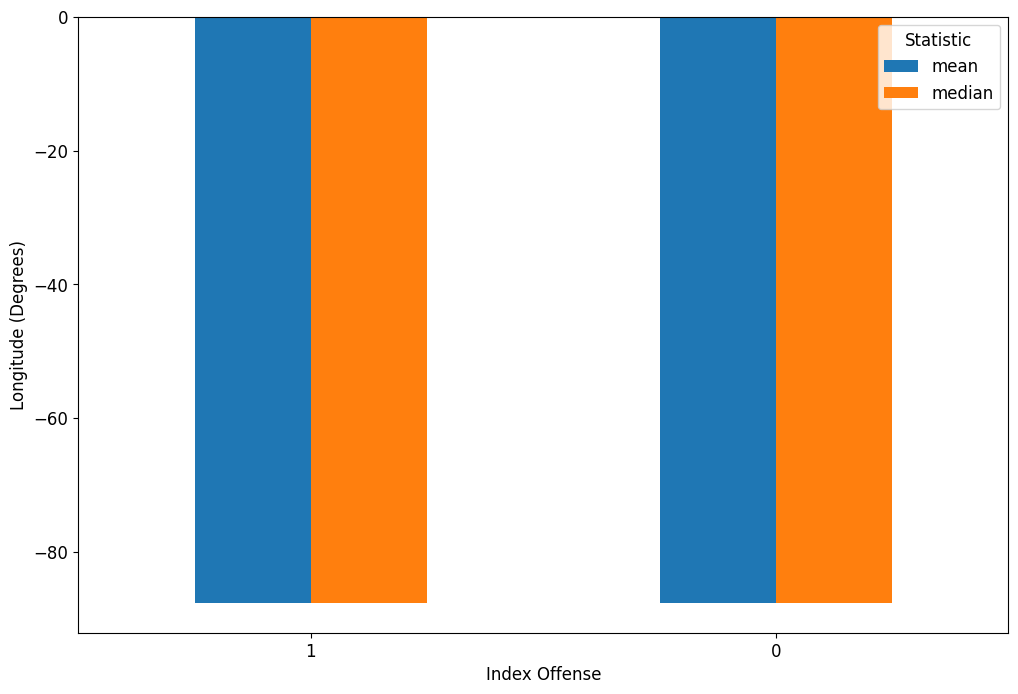

In [103]:
groupby_describe_func(df=chicago_crime, byvar='index_offense', 
                      var='longitude', sortvar='mean')[['mean', '50%']].head(10).plot(kind='bar');
plt.xticks(rotation='horizontal');
plt.xlabel('Index Offense');
plt.ylabel('Longitude (Degrees)');
plt.legend(title='Statistic', labels=('mean', 'median'), loc='upper right');

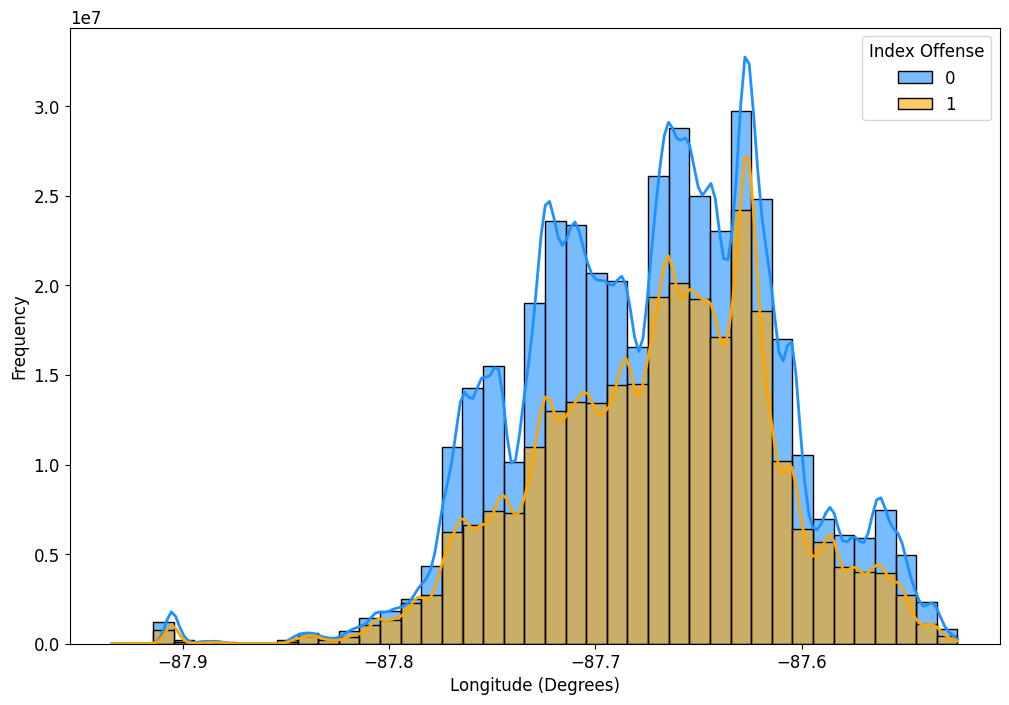

In [104]:
x1 = chicago_crime[(chicago_crime.longitude.notnull())].loc[chicago_crime.index_offense==0, 'longitude']
x2 = chicago_crime[(chicago_crime.longitude.notnull())].loc[chicago_crime.index_offense==1, 'longitude']

# Plot
kwargs = dict(line_kws={'linewidth': 2})

sns.histplot(x1,
             stat='frequency', # 'frequency' equivalent to 'count' when binwidth=1
             binwidth=0.01,
             #discrete=True,
             kde=True,
             color='dodgerblue',
             alpha=.6,
             label='0',
             **kwargs)
sns.histplot(x2,
             stat='frequency', # 'frequency' equivalent to 'count' when binwidth=1
             binwidth=0.01,
             #discrete=True,
             kde=True,
             color='orange',
             alpha=.6,
             label='1',
             **kwargs)
#plt.xlim(left, right)
plt.xlabel('Longitude (Degrees)')
plt.ylabel('Frequency')
plt.legend(title='Index Offense', loc='upper right');

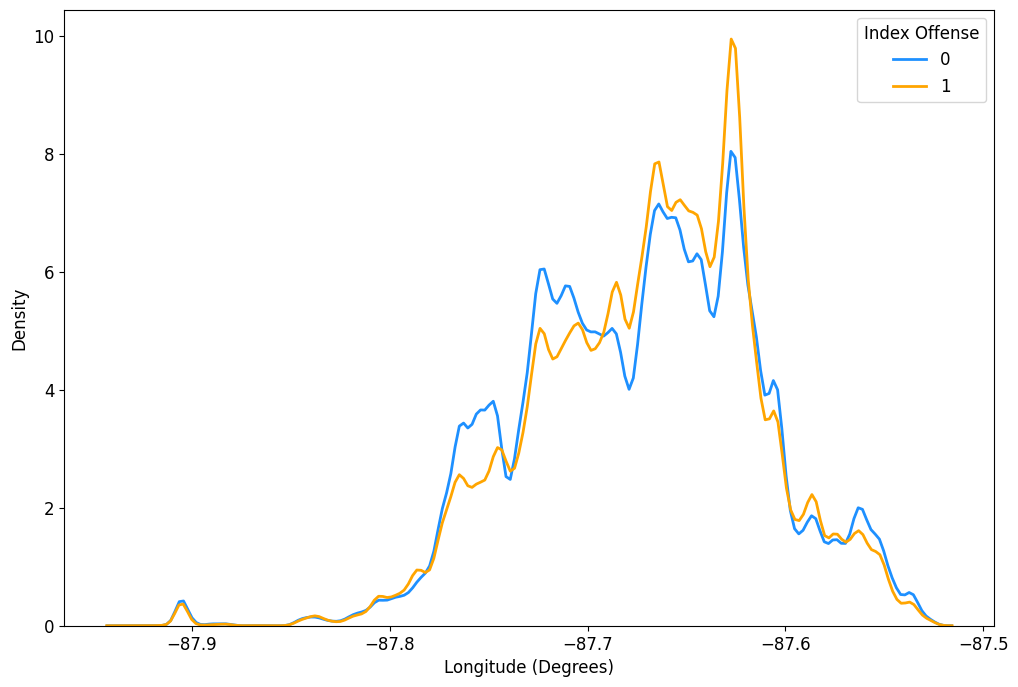

In [105]:
x1 = chicago_crime[(chicago_crime.longitude.notnull())].loc[chicago_crime.index_offense==0, 'longitude']
x2 = chicago_crime[(chicago_crime.longitude.notnull())].loc[chicago_crime.index_offense==1, 'longitude']

# Plot
sns.kdeplot(x1,
            color='dodgerblue',
            linewidth=2,
            label='0')
sns.kdeplot(x2,
            color='orange',
            linewidth=2,
            label='1')
#plt.xlim(left, right)
plt.xlabel('Longitude (Degrees)')
plt.ylabel('Density')
plt.legend(title='Index Offense', loc='upper right');

[Normality Tests](https://machinelearningmastery.com/a-gentle-introduction-to-normality-tests-in-python/)
- QQ Plot
- Shapiro-Wilk test

index_offense   
0              0    Figure(1200x800)
1              0    Figure(1200x800)
Name: longitude, dtype: object

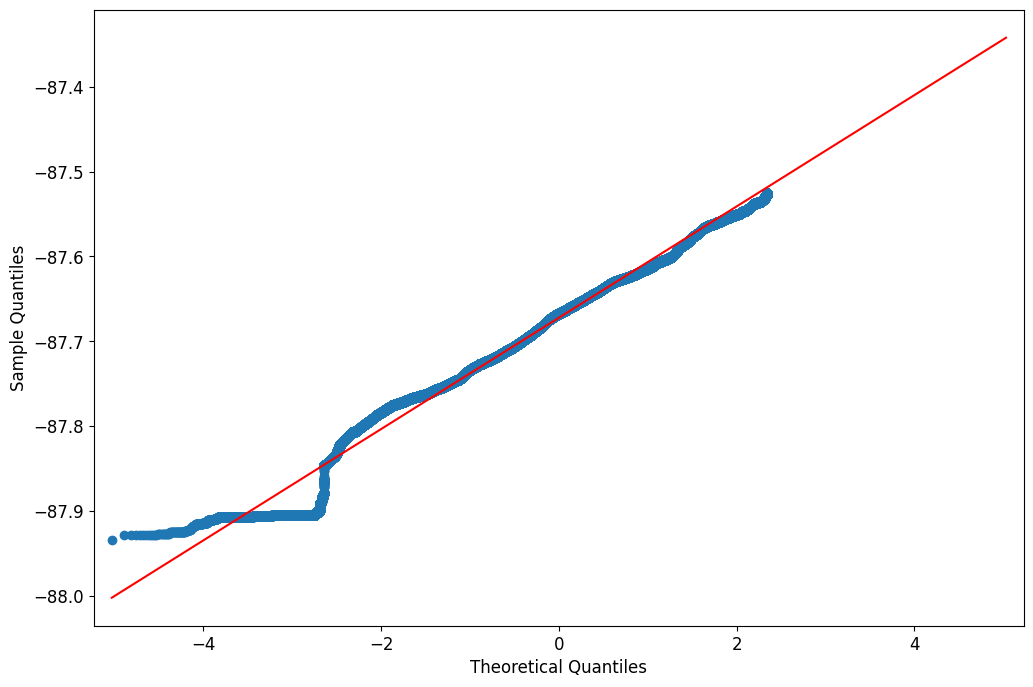

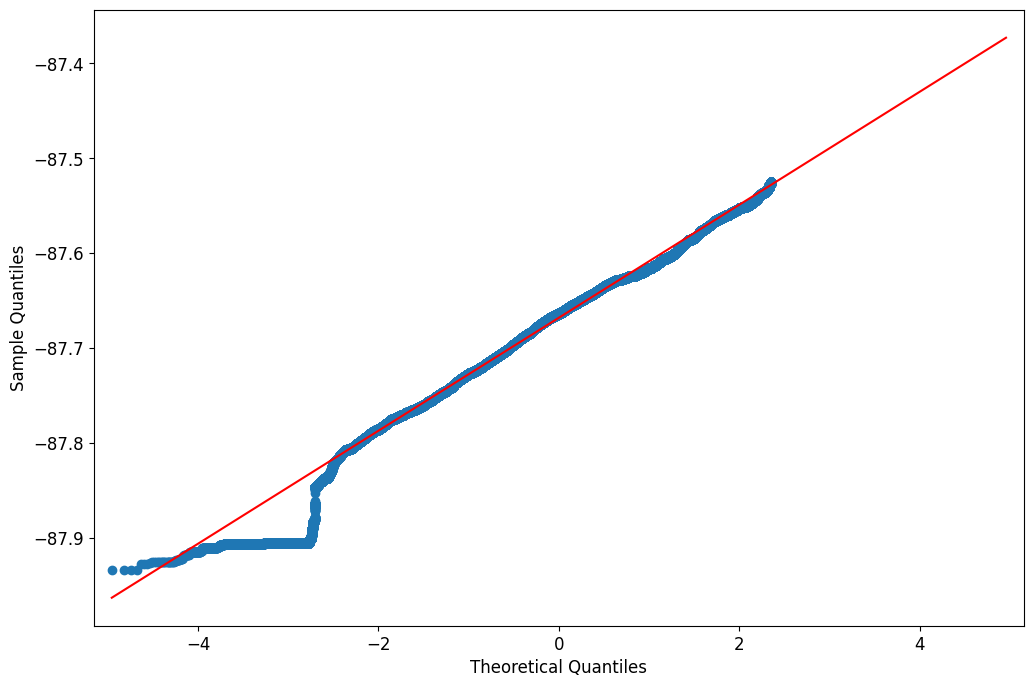

In [106]:
# Q-Q plot of the quantiles of x versus the quantiles/ppf of a distribution
# Note: dist: comparison distribution; the default is scipy.stats.distributions.norm (a standard normal)
#       line: options for the reference line to which the data is compared;
#             "45" - 45-degree line
#             "s" - standardized line, the expected order statistics are scaled by the standard deviation of the given sample and have the mean added to them
#             "r" - A regression line is fit
#             "q" - A line is fit through the quartile
chicago_crime.groupby(by='index_offense').longitude.apply(lambda x: pd.Series(sm.qqplot(x, line='q')))
#plt.show()

In [107]:
# Perform the Shapiro-Wilk test for normality
# The Shapiro-Wilk test tests the null hypothesis that the data was drawn from a normal distribution
# Note: p-value may not be accurate for N > 5000
sw_df = round(chicago_crime.groupby(by='index_offense').longitude \
        .apply(lambda x: pd.Series(stats.shapiro(x.dropna()), index=['W-statistic', 'p-value'])), 3)
print('Shapiro-Wilk test:')
print('H0: the sample has a Normal distribution \nHa: the sample does not have a Normal distribution\n')
print(sw_df)

/Users/yangweichle/myenv/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 4071389.
  res = hypotest_fun_out(*samples, **kwds)


Shapiro-Wilk test:
H0: the sample has a Normal distribution 
Ha: the sample does not have a Normal distribution

index_offense             
0              W-statistic    0.99
               p-value         0.0
1              W-statistic   0.988
               p-value         0.0
Name: longitude, dtype: float64


/Users/yangweichle/myenv/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 2739589.
  res = hypotest_fun_out(*samples, **kwds)


[Mann-Whitney U test](https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/)

In [108]:
# Compute the Mann-Whitney rank test on samples x and y
# Use only when the number of observation in each sample is > 20 and you have 2 independent samples of ranks
# This test corrects for ties and by default uses a continuity correction
# Note: alternative: defines the alternative hypothesis;
#                    'two-sided', 'less': one-sided, 'greater': one-sided
statistic, pvalue = stats.mannwhitneyu(*chicago_crime.dropna(subset=['longitude']).groupby(by='index_offense').longitude.apply(lambda x: list(x)),
                                       alternative='two-sided')
print('Mann-Whitney U test:')
print('U-statistic =', round(statistic, 3))
print('p-value     =', round(pvalue, 3))

Mann-Whitney U test:
U-statistic = 5364143807612.0
p-value     = 0.0


[Independent Two-Sample T-test](https://pythonfordatascience.org/independent-t-test-python/)

In [109]:
# Calculate the T-test for the means of *two independent* samples of scores
# Note: equal_var: if True (default), perform a standard independent 2 sample test that assumes equal population variances;
#                  if False, perform Welch's t-test, which does not assume equal population variance
#       nan_policy: defines how to handle when input contains nan. 'propagate' returns nan, 'raise' throws an error,
#                   'omit' performs the calculations ignoring nan values; default is 'propagate'
statistic, pvalue = stats.ttest_ind(*chicago_crime.groupby(by='index_offense').longitude.apply(lambda x: list(x)),
                                    equal_var=True, nan_policy='omit')
print('Independent Two-Sample t-test:')
print('t-statistic =', round(statistic, 3))
print('p-value     =', round(pvalue, 3))

Independent Two-Sample t-test:
t-statistic = -76.291
p-value     = 0.0


In [110]:
a = chicago_crime.groupby(by='index_offense').longitude.apply(lambda x: list(x))
a0 = pd.Series(a[0])
a1 = pd.Series(a[1])
descriptives, results = rp.ttest(a0, a1, group1_name='Non-Index', group2_name='Index')
round(descriptives, 3)

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,Non-Index,"4,071,389.0",-87.673,0.06,0.0,-87.673,-87.673
1,Index,"2,739,589.0",-87.67,0.057,0.0,-87.67,-87.67
2,combined,"6,810,978.0",-87.672,0.059,0.0,-87.672,-87.672


In [111]:
round(results, 3)

,Independent t-test,results
0,Difference (Non-Index - Index) =,-0.004
1,Degrees of freedom =,"6,810,976.0"
2,t =,-76.292
3,Two side test p value =,0.0
4,Difference < 0 p value =,0.0
5,Difference > 0 p value =,1.0
6,Cohen's d =,-0.06
7,Hedge's g =,-0.06
8,Glass's delta1 =,-0.058
9,Point-Biserial r =,-0.029


### Data Modeling

#### Build and train classification models

#### Predicting Index Offense

In [112]:
print('Percentage of Index Offense=No(0), Index Offense=Yes(1)')
# Categorical column frequency
# Returns counts of unique values in descending order (first element is the most frequently-occurring element)
# Note: Excludes NA values by default
value_counts_func(chicago_crime, 'index_offense', bar=False)

Percentage of Index Offense=No(0), Index Offense=Yes(1)


index_offense,counts,percentage
0,4110507,59.78
1,2765439,40.22


### Note: CLASSES ARE `NOT` IMBALANCED!!
- Resampling not necessary

#### Create dummy variables for `location_description_cat`, `district`, and `year`.

In [113]:
# Categorical column frequency
# Returns counts of unique values in descending order (first element is the most frequently-occurring element)
# Note: Excludes NA values by default
value_counts_func(chicago_crime, 'location_description_cat', bar=False)

location_description_cat,counts,percentage
STREET,1798028,26.15
RESIDENCE,1164770,16.94
OTHER,1112276,16.18
APARTMENT,715525,10.41
SIDEWALK,674226,9.81
PARKING LOT/GARAGE(NON.RESID.),197408,2.87
ALLEY,153088,2.23
"SCHOOL, PUBLIC, BUILDING",144323,2.10
RESIDENCE-GARAGE,133047,1.93
SMALL RETAIL STORE,122737,1.79


In [114]:
# Convert categorical variable into dummy/indicator variables
# Note: prefix: string to append DataFrame column names
#       drop_first=True removes the first level to get k-1 dummies out of k categorical events
# Join columns with other DataFrame either on index or on a key
#chicago_crime.join(pd.get_dummies(chicago_crime.location_description_cat, prefix='location', drop_first=False)).columns
chicago_crime = chicago_crime.join(pd.get_dummies(chicago_crime.location_description_cat, prefix='location', drop_first=False))

# Remove columns by specifying directly column names
# Note: inplace=True changes the original DataFrame
chicago_crime.drop(columns=['location_STREET'], inplace=True)
chicago_crime.head()

,date,block,iucr,primary_type,description,location_description,arrest,domestic,beat,district,...,location_PARKING LOT/GARAGE(NON.RESID.),location_RESIDENCE,location_RESIDENCE PORCH/HALLWAY,location_RESIDENCE-GARAGE,location_RESIDENTIAL YARD (FRONT/BACK),location_RESTAURANT,"location_SCHOOL, PUBLIC, BUILDING",location_SIDEWALK,location_SMALL RETAIL STORE,location_VEHICLE NON-COMMERCIAL
0,2019-05-15,095XX S AVALON AVE,1750,OFFENSE INVOLVING CHILDREN,CHILD ABUSE,RESIDENCE,0,1,511,5.0,...,False,True,False,False,False,False,False,False,False,False
1,2019-05-06,052XX S WELLS ST,4651,OTHER OFFENSE,SEX OFFENDER: FAIL REG NEW ADD,RESIDENCE,0,0,935,9.0,...,False,True,False,False,False,False,False,False,False,False
2,2019-05-02,033XX W FOSTER AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,SIDEWALK,1,0,1712,17.0,...,False,False,False,False,False,False,False,True,False,False
3,2019-03-29,087XX S STONY ISLAND AVE,0497,BATTERY,AGGRAVATED DOMESTIC BATTERY: OTHER DANG WEAPON,PARKING LOT/GARAGE(NON.RESID.),0,1,412,4.0,...,True,False,False,False,False,False,False,False,False,False
4,2019-03-22,101XX S AVENUE L,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,0,0,432,4.0,...,False,False,False,False,False,False,False,False,False,False


In [115]:
# Categorical column frequency
# Returns counts of unique values in descending order (first element is the most frequently-occurring element)
# Note: Excludes NA values by default
value_counts_func(chicago_crime, 'district', bar=False)

district,counts,percentage
8.000000,466902,6.79
11.000000,441055,6.41
7.000000,405313,5.89
6.000000,396756,5.77
25.000000,396116,5.76
4.000000,389527,5.67
3.000000,349137,5.08
9.000000,340929,4.96
12.000000,336801,4.90
2.000000,325978,4.74


In [116]:
# Convert the numeric column to string type
chicago_crime['district_cat'] = chicago_crime['district'].astype(str)

In [117]:
# Convert categorical variable into dummy/indicator variables
# Note: prefix: string to append DataFrame column names
#       drop_first=True removes the first level to get k-1 dummies out of k categorical events
# Join columns with other DataFrame either on index or on a key
#chicago_crime.join(pd.get_dummies(chicago_crime.district, prefix='district', drop_first=False)).columns
chicago_crime = chicago_crime.join(pd.get_dummies(chicago_crime.district, prefix='district_cat', drop_first=False))

# Remove columns by specifying directly column names
# Note: inplace=True changes the original DataFrame
chicago_crime.drop(columns=['district_cat_8.0'], inplace=True)
chicago_crime.head()

,date,block,iucr,primary_type,description,location_description,arrest,domestic,beat,district,...,district_cat_14.0,district_cat_15.0,district_cat_16.0,district_cat_17.0,district_cat_18.0,district_cat_19.0,district_cat_20.0,district_cat_22.0,district_cat_24.0,district_cat_25.0
0,2019-05-15,095XX S AVALON AVE,1750,OFFENSE INVOLVING CHILDREN,CHILD ABUSE,RESIDENCE,0,1,511,5.0,...,False,False,False,False,False,False,False,False,False,False
1,2019-05-06,052XX S WELLS ST,4651,OTHER OFFENSE,SEX OFFENDER: FAIL REG NEW ADD,RESIDENCE,0,0,935,9.0,...,False,False,False,False,False,False,False,False,False,False
2,2019-05-02,033XX W FOSTER AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,SIDEWALK,1,0,1712,17.0,...,False,False,False,True,False,False,False,False,False,False
3,2019-03-29,087XX S STONY ISLAND AVE,0497,BATTERY,AGGRAVATED DOMESTIC BATTERY: OTHER DANG WEAPON,PARKING LOT/GARAGE(NON.RESID.),0,1,412,4.0,...,False,False,False,False,False,False,False,False,False,False
4,2019-03-22,101XX S AVENUE L,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,0,0,432,4.0,...,False,False,False,False,False,False,False,False,False,False


In [118]:
# Categorical column frequency
# Returns counts of unique values in descending order (first element is the most frequently-occurring element)
# Note: Excludes NA values by default
value_counts_func(chicago_crime, 'year', bar=False)

year,counts,percentage
2002,486744,7.08
2001,485732,7.06
2003,475933,6.92
2004,469370,6.83
2005,453716,6.60
2006,448111,6.52
2007,437010,6.36
2008,427036,6.21
2009,392682,5.71
2010,370299,5.39


In [119]:
# Convert the numeric column to string type
chicago_crime['year_cat'] = chicago_crime['year'].astype(str)

In [120]:
# Convert categorical variable into dummy/indicator variables
# Note: prefix: string to append DataFrame column names
#       drop_first=True removes the first level to get k-1 dummies out of k categorical events
# Join columns with other DataFrame either on index or on a key
chicago_crime = chicago_crime.join(pd.get_dummies(chicago_crime.year, prefix='year_cat', drop_first=True))
chicago_crime.head()

,date,block,iucr,primary_type,description,location_description,arrest,domestic,beat,district,...,year_cat_2010,year_cat_2011,year_cat_2012,year_cat_2013,year_cat_2014,year_cat_2015,year_cat_2016,year_cat_2017,year_cat_2018,year_cat_2019
0,2019-05-15,095XX S AVALON AVE,1750,OFFENSE INVOLVING CHILDREN,CHILD ABUSE,RESIDENCE,0,1,511,5.0,...,False,False,False,False,False,False,False,False,False,True
1,2019-05-06,052XX S WELLS ST,4651,OTHER OFFENSE,SEX OFFENDER: FAIL REG NEW ADD,RESIDENCE,0,0,935,9.0,...,False,False,False,False,False,False,False,False,False,True
2,2019-05-02,033XX W FOSTER AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,SIDEWALK,1,0,1712,17.0,...,False,False,False,False,False,False,False,False,False,True
3,2019-03-29,087XX S STONY ISLAND AVE,0497,BATTERY,AGGRAVATED DOMESTIC BATTERY: OTHER DANG WEAPON,PARKING LOT/GARAGE(NON.RESID.),0,1,412,4.0,...,False,False,False,False,False,False,False,False,False,True
4,2019-03-22,101XX S AVENUE L,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,0,0,432,4.0,...,False,False,False,False,False,False,False,False,False,True


In [121]:
chicago_crime.columns

Index(['date', 'block', 'iucr', 'primary_type', 'description',
       'location_description', 'arrest', 'domestic', 'beat', 'district',
       'ward', 'community_area', 'fbi_code', 'x_coordinate', 'y_coordinate',
       'year', 'updated_on', 'latitude', 'longitude', 'lat_long',
       'index_offense', 'nonindex_offense', 'location_description_cat',
       'location_ALLEY', 'location_APARTMENT', 'location_DEPARTMENT STORE',
       'location_GAS STATION', 'location_GROCERY FOOD STORE', 'location_OTHER',
       'location_PARKING LOT/GARAGE(NON.RESID.)', 'location_RESIDENCE',
       'location_RESIDENCE PORCH/HALLWAY', 'location_RESIDENCE-GARAGE',
       'location_RESIDENTIAL YARD (FRONT/BACK)', 'location_RESTAURANT',
       'location_SCHOOL, PUBLIC, BUILDING', 'location_SIDEWALK',
       'location_SMALL RETAIL STORE', 'location_VEHICLE NON-COMMERCIAL',
       'district_cat', 'district_cat_1.0', 'district_cat_2.0',
       'district_cat_3.0', 'district_cat_4.0', 'district_cat_5.0',
       'd

### Building Phase

In [122]:
# # Create a list of features
# feature_cols = ['arrest', 'domestic',
#                 'location_ALLEY', 'location_APARTMENT', 'location_DEPARTMENT STORE', 'location_GAS STATION',
#                 'location_GROCERY FOOD STORE', 'location_OTHER', 'location_PARKING LOT/GARAGE(NON.RESID.)', 'location_RESIDENCE',
#                 'location_RESIDENCE PORCH/HALLWAY', 'location_RESIDENCE-GARAGE', 'location_RESIDENTIAL YARD (FRONT/BACK)',
#                 'location_RESTAURANT', 'location_SCHOOL, PUBLIC, BUILDING', 'location_SIDEWALK', 'location_SMALL RETAIL STORE',
#                 'location_VEHICLE NON-COMMERCIAL',
#                 'district_cat_1.0', 'district_cat_2.0', 'district_cat_3.0', 'district_cat_4.0', 'district_cat_5.0', 'district_cat_6.0',
#                 'district_cat_7.0', 'district_cat_9.0', 'district_cat_10.0', 'district_cat_11.0', 'district_cat_12.0', 'district_cat_14.0',
#                 'district_cat_15.0', 'district_cat_16.0', 'district_cat_17.0', 'district_cat_18.0', 'district_cat_19.0', 'district_cat_20.0',
#                 'district_cat_22.0', 'district_cat_24.0', 'district_cat_25.0',
#                 'year_cat_2002', 'year_cat_2003', 'year_cat_2004', 'year_cat_2005',
#                 'year_cat_2006', 'year_cat_2007', 'year_cat_2008', 'year_cat_2009',
#                 'year_cat_2010', 'year_cat_2011', 'year_cat_2012', 'year_cat_2013',
#                 'year_cat_2014', 'year_cat_2015', 'year_cat_2016', 'year_cat_2017',
#                 'year_cat_2018', 'year_cat_2019']

In [123]:
feature_cols = ['arrest', 'domestic', 'location_description_cat', 'district_cat', 'year_cat']

In [124]:
# Create X and y
X = chicago_crime[feature_cols]
y = chicago_crime.index_offense

In [125]:
# Split X and y into random training and testing subsets
# --> Generate stratified train and test sets for classification
# Note: train_size: between 0.0 and 1.0 and represent the proportion of the dataset to include in the train split
#       test_size: between 0.0 and 1.0 and represent the proportion of the dataset to include in the test split
#       random_state: the seed used by the random number generator
#       stratify: if not None, data is split in a stratified fashion, using this as the class labels
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.70, test_size=0.30, random_state=65, stratify=y)

print('Length of X_train: {}'.format(len(X_train)))
print('Length of y_train: {}'.format(len(y_train)))
print('Length of X_test: {}'.format(len(X_test)))
print('Length of y_test: {}'.format(len(y_test)))

Length of X_train: 4813162
Length of y_train: 4813162
Length of X_test: 2062784
Length of y_test: 2062784


#### Compute Baseline Accuracy and Other Performance Measures
[How to Get Baseline Results and Why They Matter](https://machinelearningmastery.com/how-to-get-baseline-results-and-why-they-matter/)

__Most Frequent__ Dummy Classifier

In [126]:
# Categorical column frequency
# Returns counts of unique values in descending order (first element is the most frequently-occurring element)
# Note: Excludes NA values by default
print(y_train.value_counts())
print()

most_freq_class = y_train.value_counts().index[0]
print('Most frequent class in training dataset:', most_freq_class)
print()

print('Baseline accuracy in test dataset:', round(y_test.value_counts()[most_freq_class] / y_test.count(), 3))
class_0_prob = y_test.value_counts()[0] / y_test.count()
class_1_prob = y_test.value_counts()[1] / y_test.count()

# Instantiate a classifier that makes predictions using simple rules and fit dummy classifier
# Note: stragegy: strategy to use to generate predictions
#       random_state: the seed used by the random number generator
dummy_clf = DummyClassifier(strategy='most_frequent', random_state=0)
dummy_clf.fit(X_train, y_train)
print('Baseline accuracy in test dataset:', round(dummy_clf.score(X_test, y_test), 3))

index_offense
0    2877355
1    1935807
Name: count, dtype: int64

Most frequent class in training dataset: 0

Baseline accuracy in test dataset: 0.598
Baseline accuracy in test dataset: 0.598


__Stratified__ Dummy Classifier
- The stratified classifier is more useful for imbalanced datasets as it ensures that the model is not biased toward the majority class.

In [127]:
dummy_clf_stratified = DummyClassifier(strategy='stratified', random_state=0)
dummy_clf_stratified.fit(X_train, y_train)
print('Baseline accuracy in test dataset:', round(metrics.accuracy_score(y_test, dummy_clf_stratified.predict(X_test)), 3))
print('Baseline precision in test dataset:', round(metrics.precision_score(y_test, dummy_clf_stratified.predict(X_test)), 3))
print('Baseline recall in test dataset:', round(metrics.recall_score(y_test, dummy_clf_stratified.predict(X_test)), 3))
print('Baseline F1 score in test dataset:', round(metrics.f1_score(y_test, dummy_clf_stratified.predict(X_test)), 3))

Baseline accuracy in test dataset: 0.519
Baseline precision in test dataset: 0.402
Baseline recall in test dataset: 0.403
Baseline F1 score in test dataset: 0.403


### Incorporate data preprocessing and model estimator into a pipeline
#### _Data Preprocessing_
- **Scaling Numerical Features:** Scaling numerical features (e.g., using `StandardScaler`) is a standard preprocessing step to improve the training process for machine learning models. It is performed to ensure that all numerical features have similar scales. It helps the optimization process during training and prevents features with larger scales from dominating the learning process. However, this scaling process only affects the numerical features. It does not impact the coefficients of non-numerical (categorical) features. The coefficients for categorical features are determined based on the unique categories or levels of those features and remain unchanged by the scaling of numerical features.
- **Encoding Categorical Features:** Before using categorical features in a machine learning model, you typically need to encode them into a numeric format. Common encoding techniques include one-hot encoding (for nominal features) and ordinal encoding (for ordinal features). These encoding methods create binary or integer columns to represent the categories, and these encoded features do not require scaling.
- **One-Hot Encoding:**
    - It is common practice to drop one category per feature. This is known as creating dummy variables. The reason for dropping one category (often referred to as the "reference category") is to avoid multicollinearity, which can be an issue in certain models, especially linear models like linear regression and logistic regression. Multicollinearity occurs because one-hot encoded features are linearly dependent; the value of the dropped category can be inferred from the others.
    - If you are using tree-based models (like decision trees, random forests, gradient boosting machines), it is generally not necessary to drop a category when using one-hot encoding, as these models can handle multicollinearity better than linear models. However, with large numbers of categories, one-hot encoding can lead to a very high-dimensional feature space, which might be problematic from a computational standpoint. In such cases, other encoding methods might be more efficient.
    - For distance-based algorithms like kNN and SVM, dropping one category per categorical feature after one-hot encoding is not strictly necessary. It's more important to ensure that the encoding of features are appropriate for the algorithm and that the "curse of dimensionality", where the distance in high-dimensional space becomes less meaningful, is managed effectively.

Machine learning algorithms that rely on distance-based calculations or gradient-based optimization typically require numeric features to be scaled. Scaling ensures that all features have similar scales and magnitudes, which can improve the performance and convergence of these algorithms. Here are some machine learning algorithms that commonly benefit from feature scaling:

1. **K-Nearest Neighbors (KNN):** KNN calculates distances between data points to make predictions. Feature scaling is crucial because larger magnitude features can dominate the distance calculation.

2. **Support Vector Machines (SVM):** SVM aims to find a hyperplane that maximizes the margin between classes. Scaling helps ensure that the margin is not dominated by features with larger scales.

3. **Principal Component Analysis (PCA):** PCA is used for dimensionality reduction. Feature scaling is important because PCA is sensitive to the scales of features.

4. **Gradient-Based Algorithms (e.g., Gradient Descent):** Algorithms like linear regression, logistic regression, neural networks, and many others that use gradient-based optimization techniques benefit from scaled features. Scaling helps the optimization process converge faster and more reliably.

5. **Regularized Models (e.g., Lasso, Ridge, ElasticNet):** These models involve regularization terms that depend on the scale of the coefficients. Scaling features ensures that the regularization terms treat all features equally.

6. **K-Means Clustering:** K-Means calculates cluster centroids based on the mean of data points in each cluster. Scaling helps ensure that all features contribute equally to the cluster centroids.

7. **Hierarchical Clustering:** Similar to K-Means, hierarchical clustering methods can benefit from scaled features when calculating distances between clusters.

8. **Principal Component Regression (PCR):** PCR combines PCA with regression. Scaled features are essential for both PCA and regression components.

9. **Neural Networks:** Deep learning models, including neural networks, often require feature scaling, especially when using activation functions like sigmoid or tanh.

On the other hand, some algorithms are inherently scale-invariant, meaning they don't require feature scaling. These include:

1. **Decision Trees:** Decision trees and ensemble methods based on them (e.g., Random Forests, Gradient Boosting Trees) are not sensitive to feature scales.

2. **Naive Bayes:** Naive Bayes classifiers are not affected by feature scaling since they work with probability distributions.

3. **Tree-Based Models:** Models like decision trees, Random Forests, and XGBoost are invariant to feature scaling because they make decisions based on relative feature ordering.

4. **Rule-Based Models:** Models like association rule mining (e.g., Apriori) and rule-based classifiers (e.g., RIPPER) are not affected by feature scaling.

While scaling is crucial for some algorithms, it's a best practice to perform feature scaling for most machine learning tasks. Scikit-learn provides preprocessing tools like `StandardScaler` and `MinMaxScaler` to easily scale numeric features for various algorithms.

In [128]:
# Define numerical and categorical feature columns

# List of numeric feature column names
numeric_features = []

# List of binary feature column names
binary_features = ['arrest', 'domestic']

# List of categorical feature column names
categorical_features = ['location_description_cat', 'district_cat', 'year_cat']

#### [Calibrate Probabilities of Classification Model](https://machinelearningmastery.com/calibrated-classification-model-in-scikit-learn/)

Several machine learning models produce predicted probabilities that are often uncalibrated, meaning they do not provide reliable probability estimates that correspond to the true likelihood of an event occurring. These uncalibrated models may benefit from calibration techniques to improve the accuracy of their predicted probabilities. Some common models that often produce uncalibrated probabilities include:

1. **Support Vector Machines (SVM):** SVMs are primarily designed for classification tasks and do not inherently provide well-calibrated probability estimates. The predicted scores from an SVM may not align well with actual probabilities.

2. **Random Forests:** While Random Forests are robust and powerful classifiers, they are known for producing biased probability estimates. They tend to be overconfident and may assign high probabilities to predictions, even when they are uncertain.

3. **Gradient Boosting (e.g., XGBoost, LightGBM):** Gradient boosting models, while highly accurate for classification tasks, often require post-processing calibration to obtain well-calibrated probability estimates.

4. **Neural Networks (Deep Learning):** Deep neural networks can produce poorly calibrated probability estimates, particularly when the model is overfitting or underfitting the data.

5. **K-Nearest Neighbors (KNN):** KNN, a non-parametric method, does not inherently provide probability estimates. However, you can assign probabilities based on the fraction of neighbors belonging to each class, which may require calibration.

6. **Naive Bayes:** Despite its name, Naive Bayes can produce poorly calibrated probabilities, especially when its "naive" assumption of feature independence is violated.

7. **Decision Trees:** Decision trees, when used for classification, tend to produce biased probability estimates. Ensemble methods like Random Forests, which use multiple decision trees, may also inherit this issue.

**Create a calibrated classifier using CalibratedClassifierCV**

Including `StratifiedKFold` in the `cv` parameter of `CalibratedClassifierCV` ensures that the calibration process is performed within a stratified cross-validation framework. This can help improve the robustness of probability calibration, especially in imbalanced class scenarios.

In [129]:
# Define the classifiers to be tested
classifiers = {
    
    # Instantiate a Logistic Regression classifier
    # Note: random_state: the seed used by the random number generator
    #       solver: algorithm to use in the optimization problem
    'Logistic Regression': LogisticRegression(random_state=46, solver='liblinear'),
    
    # Instantiate a classifier implementing the k-nearest neighbors vote
    # Note: n_neighbors: number of neighbors to use for k-neighbors queries
    #       algorithm: algorithm used to compute the nearest neighbor;
    #                  - 'ball_tree' will use `BallTree`
    #                  - 'kd_tree' will use `KDTree`
    #                  - 'brute' will use a brute-force search
    #                  - 'auto' will attempt to decide the most appropriate algorithm based on the values passed to `fit`
    #       n_jobs: the number of parallel jobs to run for neighbors search; -1 means using all processors
    # 'K-Nearest Neighbors': KNeighborsClassifier(algorithm='auto', n_jobs=-1),
    
    # Instantiate a decision tree classifier
    # Note: criterion: function to measure the quality of a split; supported criteria are "gini" for the Gini impurity 
    #                  and "entropy" for the information gain
    #       max_depth: maximum depth of the tree; if None, then nodes are expanded until all leaves are pure or 
    #                  until all leaves contain less than min_samples_split samples
    #       min_samples_leaf: minimum number of samples required to be at a leaf node
    #       random_state: the seed used by the random number generator
    # 'Decision Tree': DecisionTreeClassifier(random_state=46),
    
    # Instantiate a random forest classifier
    # Note: n_estimators: number of trees in the forest
    #       criterion: function to measure the quality of a split; supported criteria are "gini" for the Gini impurity 
    #                  and "entropy" for the information gain
    #       max_depth: maximum depth of the tree; if None, then nodes are expanded until all leaves are pure or 
    #                  until all leaves contain less than min_samples_split samples
    #       random_state: the seed used by the random number generator
    #       n_jobs: the number of jobs to run in parallel; -1 means using all processors
    'Random Forest': RandomForestClassifier(random_state=46, n_jobs=-1),
    
    # The SVC classifier doesn’t perform well when we have a very large dataset because the required training time is very high. 
    # Thus, the LinearSVC will be explored.
    
    # Instantiate a C-Support Vector classifier
    # Note: C: penalty parameter C of the error term (default=1.0)
    #       kernel: Specifies the kernel type to be used in the algorithm; it must be one of 'linear', 'poly',
    #               'rbf' (default), 'sigmoid', 'precomputed' or a callable
    #       gamma: kernel coefficient for 'rbf', 'poly' and 'sigmoid' (float, optional) (default='auto');
    #              if gamma is 'auto' then 1/n_features will be used instead
    #       random_state: the seed used by the random number generator
    # 'Support Vector Machine': SVC(C=1.0, kernel='linear', gamma='auto', random_state=46),
    
    # Instantiate a Linear Support Vector classifier
    # Note: penalty: 'l1' or 'l2' (default); specifies the norm used in the penalization; the 'l2' penalty is the standard
    #                used in SVC; the 'l1' leads to ``coef_`` vectors that are sparse
    #       dual: Select the algorithm to either solve the dual or primal optimization problem (default=True);
    #             prefer dual=False when n_samples > n_features
    #       C: penalty parameter C of the error term (default=1.0)
    #       random_state: the seed used by the random number generator
    #       max_iter: the maximum number of iterations to be run (default=1000)
    'Support Vector Machine': LinearSVC(dual=False, random_state=46, max_iter=10000),
    
    # Instantiate a XGBoost classifier
    # Note: n_estimators: number of gradient boosted trees; equivalent to number of boosting rounds
    #       max_depth: maximum tree depth for base learners
    #       gamma: minimum loss reduction required to make a further partition on a leaf node of the tree
    #       reg_lambda: (xgb's lambda) L2 regularization term on weights
    #       learning_rate: boosting learning rate (xgb's "eta")
    #       colsample_bytree: subsample ratio of columns when constructing each tree
    #       random_state: the seed used by the random number generator
    'XGBoost': XGBClassifier(random_state=46)
}

In [130]:
# Define classifiers that require calibration
calibrated_classifiers = ['K-Nearest Neighbors', 
                          'Decision Tree', 
                          'Random Forest', 
                          'Support Vector Machine', 
                          'XGBoost']

#### Optimize model using grid-search with cross-validation

In [131]:
# Define the parameter grid for hyperparameter tuning for each classifier
param_grid = {
    'Logistic Regression': {
        'penalty': ['l1', 'l2'],
        'C': [0.01, 0.1, 1.0, 10, 100]
    },
    'K-Nearest Neighbors': {
        'n_neighbors': [k for k in range(1, 10)]
    },
    'Decision Tree': {
        'criterion': ['gini', 'entropy'],
        'max_depth': [2, 3, 4],
        'min_samples_leaf': [1, 2, 4]
    },
    'Random Forest': {
        'n_estimators': [30, 50, 100],
        'criterion': ['gini', 'entropy'],
        'max_depth': [2, 3, 4]
    },
    'Support Vector Machine': {
        'penalty': ['l1', 'l2'],
        'C': [0.01, 0.1, 1.0, 10, 100]
    },
    'XGBoost': {
        'n_estimators': [100]
#         'n_estimators': [100, 150, 200],
#         'learning_rate': [0.01, 0.1, 0.2, 0.3],
#         'max_depth': [i for i in range(3, 7)],
#         'colsample_bytree': [i/10.0 for i in range(1, 3)],
#         'gamma': [i/10.0 for i in range(3)]
    }
}
pprint(param_grid)

{'Decision Tree': {'criterion': ['gini', 'entropy'],
                   'max_depth': [2, 3, 4],
                   'min_samples_leaf': [1, 2, 4]},
 'K-Nearest Neighbors': {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9]},
 'Logistic Regression': {'C': [0.01, 0.1, 1.0, 10, 100],
                         'penalty': ['l1', 'l2']},
 'Random Forest': {'criterion': ['gini', 'entropy'],
                   'max_depth': [2, 3, 4],
                   'n_estimators': [30, 50, 100]},
 'Support Vector Machine': {'C': [0.01, 0.1, 1.0, 10, 100],
                            'penalty': ['l1', 'l2']},
 'XGBoost': {'n_estimators': [100]}}


### Performance Measures
[Classification Accuracy is Not Enough: More Performance Measures You Can Use](https://machinelearningmastery.com/classification-accuracy-is-not-enough-more-performance-measures-you-can-use/)

### $\text{Precision = Positive Predictive Value (PPV)} = {TP \over (TP \ + \ FP)} = {TP \over (Total \ Predicted \ Positive)} --> \text{completeness}$
- "How many of the items selected are relevant"
- Of the items placed into a class, how many of them are True Positives.
- The ability of the classifier to not label a sample as positive if it is negative.

### $\text{Recall = True Positive Rate (Sensitivity)} = {TP \over (TP \ + \ FN)} = {TP \over (Total \ Actual \ Positive)} --> \text{exactness}$
- "How many of the relevant items are selected"
- Of the items that were suppose to be placed into a class, how many did we accurately place.
- The ability of the classifier to find all the positive samples.

### $F_{1}Score = 2*\frac{\text{Precision * Recall}}{\text{Precision + Recall}}$
- 0 <= F1 <= 1, where 0 is awful and 1 is perfection.
- F1 is considered a harmonic mean as it averages Precision and Recall.
- With classification models you often times have to choose what kind of error you are willing to increase in order to reduce the other and thus you may want to optimize Precision or Recall accordingly.
- If you are uncertain which you should optimize, F1 score may be the metric of choice.

In [132]:
# Iterate over the classifiers and perform GridSearchCV
for name, clf in classifiers.items():
    
    # Create preprocessing transformers for numeric and categorical features
    numeric_transformer = Pipeline(steps=[
        ('scaler', StandardScaler()) # Scaling for numeric features
    ])
    
    if name in ['Logistic Regression', 'Support Vector Machine']:
        categorical_transformer = Pipeline(steps=[
            ('onehot', OneHotEncoder(drop=['STREET', '8.0', '2001'])) # One-hot encoding for categorical features (linear models)
        ])
    else:
        categorical_transformer = Pipeline(steps=[
            ('onehot', OneHotEncoder()) # One-hot encoding for categorical features (non-linear models)
        ])
    
    # Applies transformers to columns of an array or pandas DataFrame
    # -> This estimator allows different columns or column subsets of the input to be transformed separately 
    #    and the features generated by each transformer will be concatenated to form a single feature space
    # -> This is useful for heterogeneous or columnar data, to combine several feature extraction mechanisms 
    #    or transformations into a single transformer
    # Note: transformers: list of (name, transformer, column(s)) tuples specifying the transformer objects 
    #                     to be applied to subsets of the data
    #       remainder: {'drop', 'passthrough'} or estimator, default 'drop'
    #                  By default, only the specified columns in `transformers` are transformed and combined 
    #                  in the output, and the non-specified columns are dropped. (default of ``'drop'``).
    #                  By specifying remainder='passthrough', all remaining columns that were not specified 
    #                  in `transformers` will be automatically passed through. 
    #                  This subset of columns is concatenated with the output of the transformers.
    if name in ['Decision Tree', 'Random Forest', 'XGBoost']:
        preprocessor = ColumnTransformer(
            transformers=[
                # ('num', 'passthrough', numeric_features), # No numeric features (Scaling not necessary for tree-based models)
                ('bin', 'passthrough', binary_features),
                ('cat', categorical_transformer, categorical_features)
            ],
        #     remainder='passthrough'
        )
    else:
        preprocessor = ColumnTransformer(
            transformers=[
                # ('num', numeric_transformer, numeric_features), # No numeric features
                ('bin', 'passthrough', binary_features),
                ('cat', categorical_transformer, categorical_features)
            ],
        #     remainder='passthrough'
        )
    # preprocessor
    
    # Conditionally wrap classifiers that require calibration
    if name in calibrated_classifiers:

        # Probability calibration with isotonic regression or logistic regression
        # Note: estimator: the classifier whose output decision function needs to be calibrated to provide more accurate predict_proba outputs
        #       method: method to use for calibration; 'sigmoid' or 'isotonic'; 'sigmoid' corresponds to Platt's method;
        #               'isotonic' is a non-parametric approach; not advised to use isotonic with too few calibration samples
        #       cv: determines the cross-validation splitting strategy
        #       ensemble: Determines how the calibrator is fitted when cv is not 'prefit'; ignored if cv='prefit'
        #                 If `True`, the `estimator` is fitted using training data and calibrated using testing 
        #                   data, for each `cv` fold. The final estimator is an ensemble of `n_cv` fitted classifier 
        #                   and calibrator pairs, where `n_cv` is the number of cross-validation folds. The output is 
        #                   the average predicted probabilities of all pairs.
        #                 If `False`, `cv` is used to compute unbiased predictions, via `cross_val_predict`, which are 
        #                   then used for calibration. At prediction time, the classifier used is the `estimator`
        #                   trained on all the data.
        clf = CalibratedClassifierCV(estimator=clf, method='sigmoid',
                                     cv=5, ensemble=False)
        adjusted_param_grid = {f'clf__estimator__{key}': value for key, value in param_grid[name].items()}
    else:
        adjusted_param_grid = {f'clf__{key}': value for key, value in param_grid[name].items()}
    
    # Construct the pipeline
    pipeline = Pipeline(
        steps=[
            ('preprocessor', preprocessor), # Apply preprocessing to features
            ('clf', clf) # Classifier
    ])
    # pipeline    

    # Instantiate an exhaustive search over specified parameter values for an estimator
    # Note: estimator: estimator object
    #       param_grid: dictionary with parameters names (string) as keys and lists of parameter settings to try as values; 
    #                   this enables searching over any sequence of parameter settings
    #       scoring: a single string or a callable to evaluate the predictions on the test set
    #       n_jobs: number of jobs to run in parallel; if -1, then the number of jobs is set to the number of cores
    #       cv: number of folds in k-fold cross-validation
    #       return_train_score: if False, the cv_results_ attribute will not include training scores
    grid_search = GridSearchCV(estimator=pipeline, param_grid=adjusted_param_grid, scoring='roc_auc',
                               n_jobs=-1, cv=5, return_train_score=True)
    search_time_start = time.time()
    
    # Fit the model with all sets of parameters
    # -> Fit all the transforms/samplers one after the other and transform/sample the data,
    #    then fit the transformed/sampled data using the final estimator
    grid_search.fit(X_train, y_train)
    
    print('-'*len(name))
    print(f'{name.upper()}')
    print('-'*len(name))
    print('Grid search time:', int((time.time() - search_time_start)/60), 'minutes\n')
    
    # results = pd.DataFrame.from_dict(grid_search.cv_results_)
    # pd.DataFrame.from_dict(grid_search.cv_results_, orient='index').style.set_sticky(axis='index')
    
    print(f'Scorer function used on the held out data to choose the best parameters for the {name} model:\n{grid_search.scorer_}\n')
    print(f'Best parameters for {name}:\n{grid_search.best_params_}\n')
    print(f'Best mean cross-validated score for {name}:\n{round(grid_search.best_score_, 4)}\n')
    
    best_model = grid_search.best_estimator_
    
    # Predict the class labels using the classifier model
    y_pred = best_model.predict(X_test)
    
    # Calculate predicted probability estimates of each class
    y_pred_prob = best_model.predict_proba(X_test)[:, 1]
    
    # Training accuracy classification score
    training_acc_score = metrics.accuracy_score(y_train, best_model.predict(X_train))
    print('Training accuracy score:', round(training_acc_score, 4))
    
    # Testing accuracy classification score
    testing_acc_score = metrics.accuracy_score(y_test, y_pred)
    print('Testing accuracy score :', round(testing_acc_score, 4))
    
    # Confusion matrix to evaluate the accuracy of a classification
    print('\nConfusion Matrix:')
    conmat = metrics.confusion_matrix(y_test, y_pred)
    
    # Return a flattened array
    tn, fp, fn, tp = conmat.ravel()
    
    print(pd.DataFrame(conmat,
                       index=['True (0)', 'True (1)'],
                       columns=['Pred (0)', 'Pred (1)']))
    
    print('\nPerformance Measures:')
    cm = [['TN  ',   'FP  ', 'TN + FP'], 
          ['FN  ',   'TP  ', 'FN + TP'],
          ['TN + FN', 'FP + TP', '']]
    print(pd.DataFrame(cm,
                       index=  ['True (0) ', 'True (1) ', 'Total '],
                       columns=['Pred (0)', 'Pred (1)', 'Total']))
    
    print('\nSensitivity (Recall)                        = TP/(TP + FN) =', round(tp/(tp + fn), 4))
    print('Specificity                                 = TN/(FP + TN) =', round(tn/(fp + tn), 4))
    print('Precision (Positive Predictive Value (PPV)) = TP/(TP + FP) =', round(tp/(tp + fp), 4))
    print('Negative Predictive Value (NPV))            = TN/(FN + TN) =', round(tn/(fn + tn), 4))
    print('F1 Score                                    = 2*(Precision*Recall)/(Precision + Recall) =', round(2*(tp)/(2*(tp) + fp + fn), 4))
    print('\nAccuracy = (TP + TN)/(TP + TN + FP + FN) =', round((tp + tn)/(tp + tn + fp + fn), 4))
    
    # Build a text report showing the main classification metrics
    print(f'\nClassification report for {name}:\n{metrics.classification_report(y_test, y_pred)}\n')
    
    # Area Under the Receiver Operating Characteristic Curve (ROC AUC)
    roc_auc = metrics.roc_auc_score(y_test, y_pred_prob)
    print('ROC AUC:', round(roc_auc, 3))
    print('')
    
    # Compute Precision-Recall (PR) Curve
    # Note: This implementation is restricted to the binary classification task
    precision, recall, _ = metrics.precision_recall_curve(y_test, y_pred_prob)
    
    # Compute Precision-Recall (PR) Area Under the Curve (AUC) Score
    auc = metrics.auc(x=recall, y=precision)
    print('PR AUC:', round(auc, 3))
    print('The focus on the positive (minority) class makes the Precision-Recall AUC more useful for imbalanced classification')
    print('\n')
    
    print('Evaluation Metrics to Compare Models that Predict Probabilities')
    print('---------------------------------------------------------------')
    print('')
    
    # Log loss, aka logistic loss or cross-entropy loss
    print('Log Loss:')
    # Using baseline probabilities for both classes
    baseline_probs = [[class_0_prob, class_1_prob] for _ in range(len(y_test))]
    avg_logloss_baseline = metrics.log_loss(y_test, baseline_probs)
    print('Baseline = %.3f' % (avg_logloss_baseline))

    # Using model predicted probabilities of the positive class
    avg_logloss_model = metrics.log_loss(y_test, y_pred_prob)
    print('Model    =', round(avg_logloss_model, 3))
    print('')
    
    # Brier Score
    print('Brier Score:')
    print(' -> Focused on the positive class, which for imbalanced classification is the minority class')
    # Using baseline probabilities for the positive class
    baseline_probs_pos_class = [col[1] for col in baseline_probs]
    avg_brier_score_baseline = metrics.brier_score_loss(y_test, baseline_probs_pos_class)
    print('Baseline = %.3f' % (avg_brier_score_baseline))

    # Using model predicted probabilities of the positive class
    avg_brier_score_model = metrics.brier_score_loss(y_test, y_pred_prob)
    print('Model    =', round(avg_brier_score_model, 3))
    
    # Brier Skill Score (BSS)
    # BSS = 1 - (BS_mod / BS_ref)
    bss = 1 - (avg_brier_score_model / avg_brier_score_baseline)
    print('Brier Skill Score =', round(bss, 3))
    print('\n'*2)

-------------------
LOGISTIC REGRESSION
-------------------
Grid search time: 17 minutes

Scorer function used on the held out data to choose the best parameters for the Logistic Regression model:
make_scorer(roc_auc_score, response_method=('decision_function', 'predict_proba'))

Best parameters for Logistic Regression:
{'clf__C': 100, 'clf__penalty': 'l1'}

Best mean cross-validated score for Logistic Regression:
0.7614

Training accuracy score: 0.6998
Testing accuracy score : 0.6992

Confusion Matrix:
          Pred (0)  Pred (1)
True (0)    900023    333129
True (1)    287352    542280

Performance Measures:
          Pred (0) Pred (1)    Total
True (0)      TN       FP    TN + FP
True (1)      FN       TP    FN + TP
Total      TN + FN  FP + TP         

Sensitivity (Recall)                        = TP/(TP + FN) = 0.6536
Specificity                                 = TN/(FP + TN) = 0.7299
Precision (Positive Predictive Value (PPV)) = TP/(TP + FP) = 0.6195
Negative Predictive Value (N

/Users/yangweichle/myenv/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


-------------
RANDOM FOREST
-------------
Grid search time: 211 minutes

Scorer function used on the held out data to choose the best parameters for the Random Forest model:
make_scorer(roc_auc_score, response_method=('decision_function', 'predict_proba'))

Best parameters for Random Forest:
{'clf__estimator__criterion': 'entropy', 'clf__estimator__max_depth': 4, 'clf__estimator__n_estimators': 100}

Best mean cross-validated score for Random Forest:
0.7597

Training accuracy score: 0.6968
Testing accuracy score : 0.6962

Confusion Matrix:
          Pred (0)  Pred (1)
True (0)    894180    338972
True (1)    287714    541918

Performance Measures:
          Pred (0) Pred (1)    Total
True (0)      TN       FP    TN + FP
True (1)      FN       TP    FN + TP
Total      TN + FN  FP + TP         

Sensitivity (Recall)                        = TP/(TP + FN) = 0.6532
Specificity                                 = TN/(FP + TN) = 0.7251
Precision (Positive Predictive Value (PPV)) = TP/(TP + FP) 

#### Interpret the Prediction of Probabilities for Binary Classification Models
[ROC Curves and Precision-Recall Curves for Classification](https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/)

- **ROC Curves** are appropriate when the *observations are balanced between each class*, whereas **Precision-Recall Curves** are appropriate for *imbalanced datasets*
    - ROC Curves should be used when there are roughly equal numbers of observations for each class
    - Precision-Recall Curves should be used when there is a moderate to large class imbalance


- **ROC Curves** summarize the trade-off between the **True Positive Rate (Sensitivity)** and **False Positive Rate (1-Specificity)** for a predictive model using different probability thresholds
    - True Positive Rate (Sensitivity) summarizes how often a positive class is predicted when the actual outcome is positive
    - False Positive Rate (1-Specificity) is also called the *false alarm rate* as it summarizes how often a positive class is predicted when the actual outcome is negative


- **Precision-Recall Curves** summarize the trade-off between the **True Positive Rate (Recall)** and the **Positive Predictive Value (Precision)** for a predictive model using different probability thresholds
    - Precision (PPV) describes how good a model is at predicting the positive class; intuitively the ability of the classifier not to label as positive a sample that is negative
    - Recall (Sensitivity) summarizes how often a positive class is predicted when the actual outcome is positive; intuitively the ability of the classifier to find all the positive samples
        - Reviewing both Precision and Recall is useful in cases where there is an imbalance in the observations between the two classes
        - Typically the large number of class 0 examples means we are less interested in the skill of the model at predicting class 0 correctly, e.g. high True Negatives
        - Key to the calculation of Precision and Recall is that the calculations do not make use of the True Negatives -- it is only concerned with the correct prediction of the minority class, class 1
        
[Optimal Threshold for ROC Curve and Precision-Recall Curve](https://machinelearningmastery.com/threshold-moving-for-imbalanced-classification/)

In [133]:
def plot_roc_curve(y_test, y_pred_prob):

    # Compute Receiver Operating Characteristic (ROC) Curve
    # Note: This implementation is restricted to the binary classification task
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)

    # Find optimal threshold based on maximizing the Geometric Mean
    # If optimized, it will seek a balance between Sensitivity and Specificity
    # Calculate the Geometric Mean for each threshold: G-Mean = sqrt(Sensitivity * Specificity)
    # Note: Sensitivity = TPR; Specificity = 1 - FPR
    gmeans = np.sqrt(tpr * (1-fpr))
    # Locate the index of the largest G-Mean
    ix = np.argmax(gmeans)
    # Identify the optimal threshold based on index of the largest G-Mean
    optimal_threshold = thresholds[ix]
    max_gmean = gmeans[ix]
    print('Optimal Threshold: {0:0.2f}'.format(optimal_threshold) + ', G-Mean: {0:0.3f}'.format(max_gmean))
    
    # Find optimal threshold based on maximizing the Youden's J statistic
    # Calculate the J statistic for each threshold: J = TPR – FPR
    J = tpr - fpr
    # Locate the index of the largest J statistic
    ix = np.argmax(J)
    # Identify the optimal threshold based on index of the largest J statistic
    optimal_threshold = thresholds[ix]
    max_j = J[ix]
    print('Optimal Threshold: {0:0.2f}'.format(optimal_threshold) + ', J statistic: {0:0.3f}'.format(max_j))
    
    # Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC) Score
    # Note: This implementation can be used with binary, multiclass and multilabel classification, 
    #       but some restrictions apply
    roc_auc = metrics.roc_auc_score(y_test, y_pred_prob)

    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.plot(fpr, tpr, label='ROC AUC = %0.3f' % roc_auc)
    plt.plot([0, 1], [0, 1], 'r--', label='No Skill')
    plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Optimal')
    plt.legend(loc='lower right')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate (1-Specificity)')
    plt.ylabel('True Positive Rate (Sensitivity)')
    plt.show()

In [134]:
def plot_precision_recall_curve(y_test, y_pred_prob, y_pred_class):
    
    # Compute Precision-Recall (PR) Curve
    # Note: This implementation is restricted to the binary classification task
    precision, recall, thresholds = metrics.precision_recall_curve(y_test, y_pred_prob)

    # Find optimal threshold based on maximizing the F-measure (F1-score)
    # If optimized, it will seek a balance between Precision and Recall
    # Calculate the F-score for each threshold: F-score = (2 * Precision * Recall) / (Precision + Recall)
    #f1_scores = (2 * precision * recall) / (precision + recall)
    f1_scores = [metrics.f1_score(y_test, (y_pred_prob >= threshold).astype('int')) for threshold in thresholds]
    # Locate the index of the largest F1-score
    ix = np.argmax(f1_scores)
    # Identify the optimal threshold based on index of the largest F1-score
    optimal_threshold = thresholds[ix]
    max_f1_score = f1_scores[ix]
    print('Optimal Threshold: {0:0.2f}'.format(optimal_threshold) + ', F1-score: {0:0.3f}'.format(max_f1_score))
    
    # Compute Precision-Recall (PR) Area Under the Curve (AUC) Score
    auc = metrics.auc(x=recall, y=precision)

    # Compute the Average Precision (AP) Score
    average_precision = metrics.average_precision_score(y_test, y_pred_prob)
    print('Average Precision (AP) Score: {0:0.3f}'.format(average_precision))

    # Compute the F1 Score, also known as balanced F-score or F-measure
    f1_score = metrics.f1_score(y_test, y_pred_class)
    print('F1 Score: {0:0.3f}'.format(f1_score))

    plt.title('2-class Precision-Recall (PR) Curve')
    plt.plot(recall, precision, label='PR AUC = {0:0.3f}'.format(auc))
    plt.scatter(recall[ix], precision[ix], marker='o', color='black', label='Optimal')
    no_skill = len(y_test[y_test==1]) / len(y_test) # ratio of positive cases in the dataset
    plt.plot([0, 1], [no_skill, no_skill], 'r--', label='No Skill')
    plt.legend()
    plt.xlabel('Recall (Sensitivity)')
    plt.ylabel('Precision (PPV)')
    plt.show()    

#### Plot Receiver Operating Characteristic (ROC) Curve
- The curves of different models can be compared directly in general or for different thresholds
- The area under the curve (AUC) can be used as a summary of the model skill
- Smaller values on the x-axis of the plot indicate lower False Positives and higher True Negatives
- Larger values on the y-axis of the plot indicate higher True Positives and lower False Negatives


- A model with perfect skill is depicted at a point at (0,1)
- A model with perfect skill is represented by a line that travels from the bottom left of the plot to the top left and then across the top to the top right

In [135]:
# plot_roc_curve(y_test, y_pred_prob)

#### Plot Precision-Recall Curve
- A model with perfect skill is depicted as a point at (1, 1)
- A skillful model is represented by a curve that bows towards (1, 1) above the flat line of no skill

In [136]:
# search_time_start = time.time()
# plot_precision_recall_curve(y_test, y_pred_prob, y_pred)
# print('Plot PR Curve time:', int((time.time() - search_time_start)/60), 'mins')